# Persiapan dan Analisis Data

### Import Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import optuna

In [49]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1KhHuJrSxyE_tnXKCR2QXqwvdGsCC-ur2/export?format=csv')

In [50]:
df.head()

,meanR,meanG,meanB,stdR,stdG,stdB,skewR,skewG,skewB,kurR,kurG,kurB,entR,entG,entB,Class
0,17.395776,18.057278,4.548844,40.818315,42.747400,15.235375,2.080558,2.117612,4.194824,2.786645,2.922868,18.932746,11.312396,11.302187,10.864530,1
1,17.048930,17.143965,4.285857,41.389466,42.116279,14.243516,2.185737,2.233318,4.195780,3.243245,3.436646,19.700106,11.256998,11.242310,10.867538,1
2,19.957301,16.498584,5.082156,48.724795,40.816921,15.203335,2.169338,2.245723,3.863509,3.069086,3.474671,17.313374,11.242156,11.228013,11.041794,1
3,19.713066,18.029258,4.707696,47.484912,43.629222,14.230307,2.135099,2.147982,3.987222,2.920590,2.926331,18.956953,11.266421,11.260806,11.034323,1
4,17.383914,14.581238,4.632718,46.006665,38.900382,14.446719,2.417031,2.458251,3.903999,4.259136,4.460186,17.438845,11.103429,11.094264,10.944285,1


In [51]:
df.drop(['Class'],axis=1,inplace=True)

In [52]:
df.shape[0]

5656

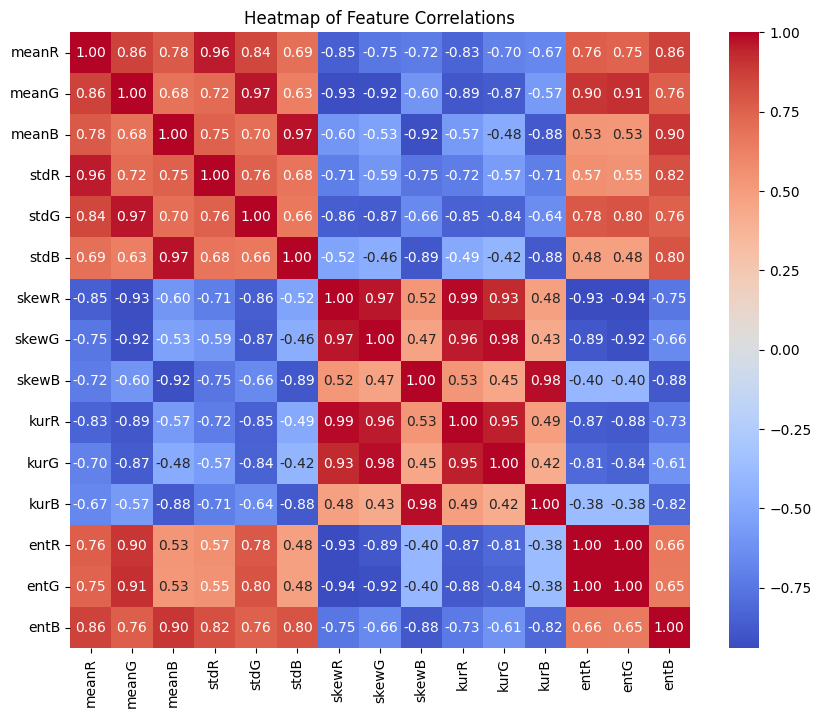

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap of Feature Correlations")
plt.show()

### Informasi Statistik Dasar

In [54]:
statistika_deskriptif = pd.DataFrame({
    'Mean': df.mean(),
    'Standard Deviation': df.std(),
    'Minimum': df.min(),
    'Maximum': df.max(),
    'Range': df.max() - df.min(),
    'Q1': df.quantile(0.25),
    'Median': df.quantile(0.5),
    'Q3': df.quantile(0.75),
})

display(statistika_deskriptif)

,Mean,Standard Deviation,Minimum,Maximum,Range,Q1,Median,Q3
meanR,20.894382,5.260718,6.854176,46.994451,40.140274,17.015386,20.055104,23.933250
meanG,18.023509,3.885058,6.259336,37.866338,31.607002,15.462487,17.823574,20.508286
meanB,5.562521,1.572465,1.823841,14.023399,12.199558,4.469088,5.206807,6.298417
stdR,49.518673,9.091646,23.889681,78.573397,54.683716,42.518804,48.737837,55.533851
stdG,43.181128,5.799811,21.816707,63.912439,42.095732,39.565446,43.274979,47.258675
stdB,16.216090,2.737406,7.831019,29.260652,21.429632,14.261454,15.830328,17.684630
skewR,2.164332,0.298941,1.154889,3.582313,2.427425,1.962475,2.147151,2.337118
skewG,2.232326,0.340901,1.203163,3.997579,2.794416,2.003130,2.188874,2.405244
skewB,3.745612,0.647198,1.944842,7.961952,6.017110,3.304125,3.764237,4.170742
kurR,3.208423,1.533598,-0.531692,12.941081,13.472773,2.161075,3.023438,3.989808


### Missing Value

In [55]:
df.isna().sum()

meanR    0
meanG    0
meanB    0
stdR     0
stdG     0
stdB     0
skewR    0
skewG    0
skewB    0
kurR     0
kurG     0
kurB     0
entR     0
entG     0
entB     0
dtype: int64

### Distribusi Data

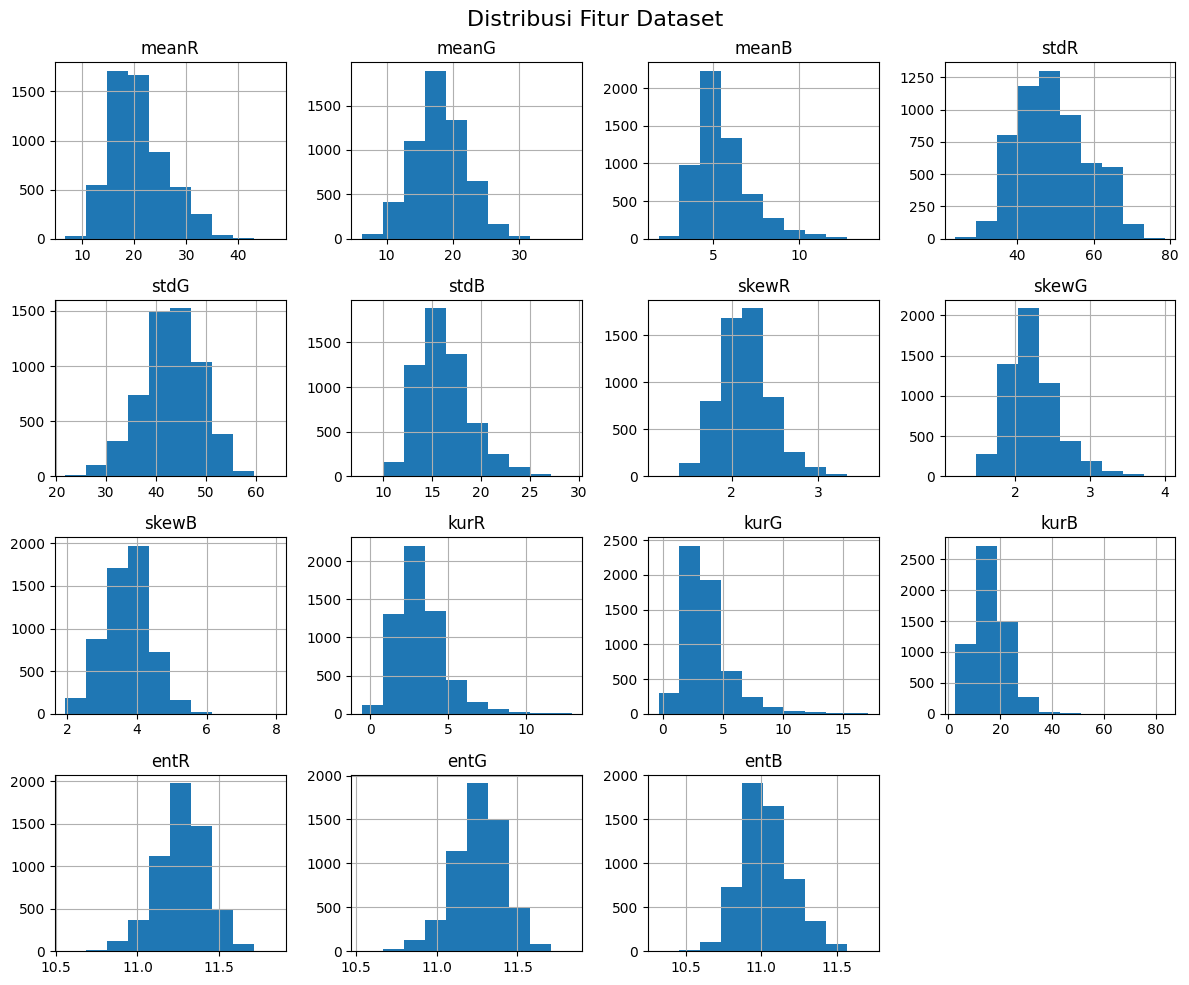

In [56]:


df.hist(figsize=(12, 10))
plt.suptitle('Distribusi Fitur Dataset', fontsize=16)
plt.tight_layout()
plt.show()

### Mengidentifikasi Outlier

In [57]:
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

for column in df.columns:
    outliers = find_outliers_iqr(df, column)
    outliers_sum = outliers.shape[0]
    if outliers.shape[0] > 0:
        print(f"Outliers in {column}: {outliers_sum}")

Outliers in meanR: 65
Outliers in meanG: 50
Outliers in meanB: 211
Outliers in stdR: 3
Outliers in stdG: 41
Outliers in stdB: 143
Outliers in skewR: 109
Outliers in skewG: 170
Outliers in skewB: 34
Outliers in kurR: 170
Outliers in kurG: 288
Outliers in kurB: 87
Outliers in entR: 99
Outliers in entG: 87
Outliers in entB: 74


In [58]:
def find_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    outliers = df[z_scores > threshold]
    return outliers

for column in df.columns:
    outliers = find_outliers_zscore(df, column)
    outliers_sum = outliers.shape[0]
    if outliers_sum > 0:
        print(f"Outliers in {column}: {outliers_sum}")

Outliers in meanR: 17
Outliers in meanG: 16
Outliers in meanB: 94
Outliers in stdR: 1
Outliers in stdG: 13
Outliers in stdB: 54
Outliers in skewR: 45
Outliers in skewG: 63
Outliers in skewB: 20
Outliers in kurR: 72
Outliers in kurG: 97
Outliers in kurB: 40
Outliers in entR: 27
Outliers in entG: 27
Outliers in entB: 23


# Preprocessing Data

### Standarisasi Z-Score

In [ ]:
zscore = StandardScaler()
df_zscore = zscore.fit_transform(df)
df = pd.DataFrame(df_zscore, columns=df.columns)

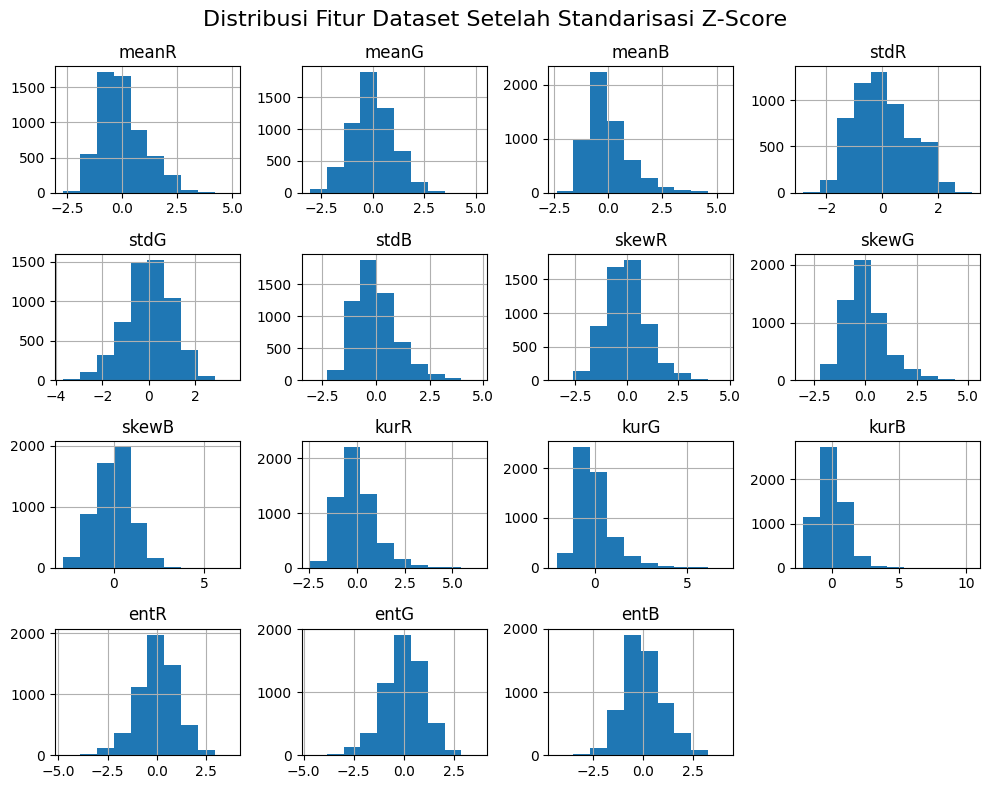

In [60]:
df.hist(figsize=(10, 8))
plt.suptitle('Distribusi Fitur Dataset Setelah Standarisasi Z-Score', fontsize=16)
plt.tight_layout()
plt.show()

### PCA

In [61]:
pca = PCA()
X_pca = pca.fit_transform(df)

num_components = 2

pca_reduced = PCA(n_components=num_components)
X_reduced = pca_reduced.fit_transform(df)

columns = [f'PC{i+1}' for i in range(num_components)]
df = pd.DataFrame(X_reduced, columns=columns)

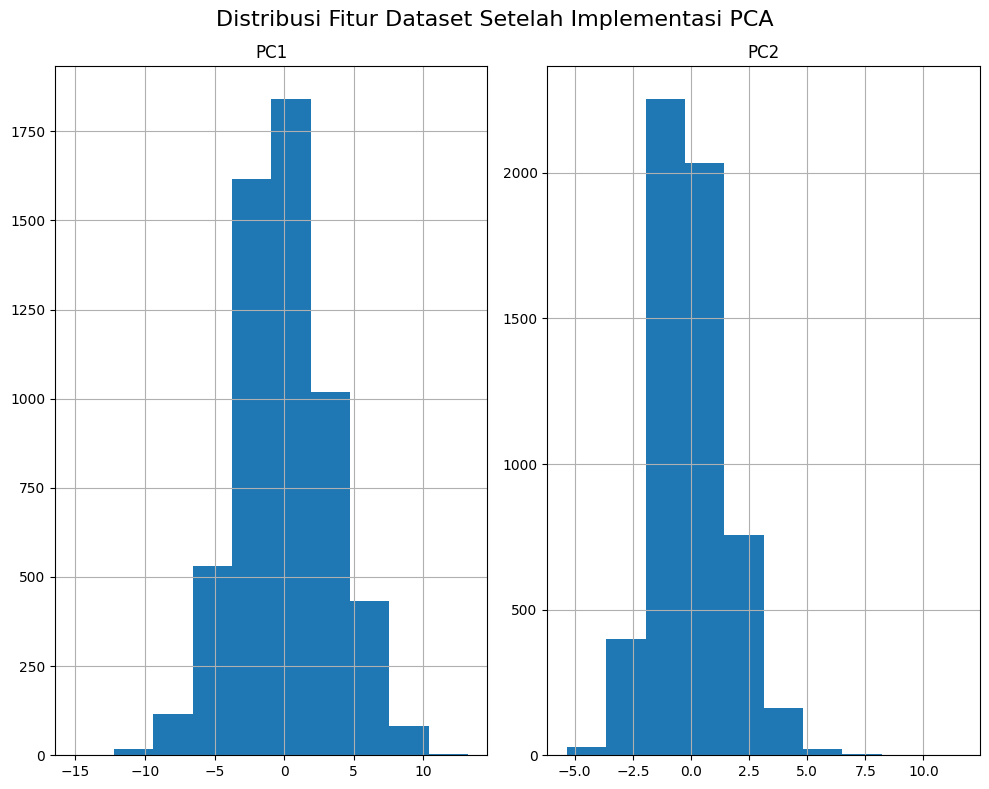

In [62]:
df.hist(figsize=(10, 8))
plt.suptitle('Distribusi Fitur Dataset Setelah Implementasi PCA', fontsize=16)
plt.tight_layout()
plt.show()

In [63]:
df.head()

,PC1,PC2
0,-0.738357,1.602585
1,-1.514797,1.284781
2,-0.600808,0.217052
3,-0.350192,1.006064
4,-2.549994,-0.572403


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656 entries, 0 to 5655
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     5656 non-null   float64
 1   PC2     5656 non-null   float64
dtypes: float64(2)
memory usage: 88.5 KB


### Normalisasi MinMax

In [65]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)

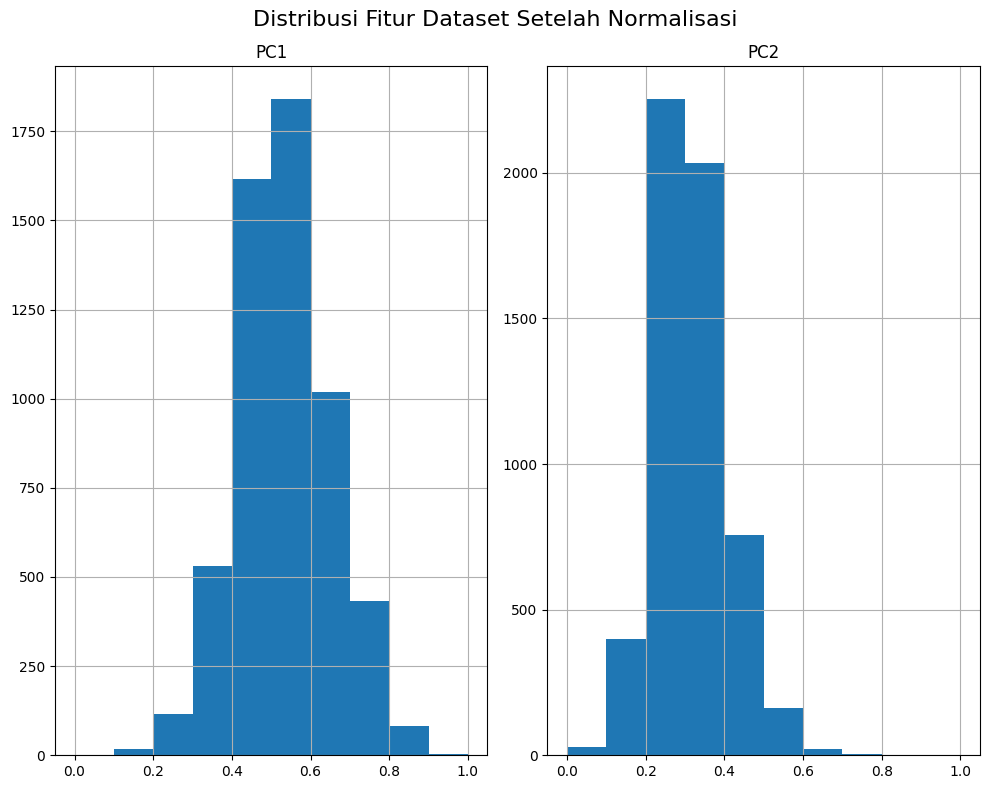

In [66]:
df.hist(figsize=(10, 8))
plt.suptitle('Distribusi Fitur Dataset Setelah Normalisasi', fontsize=16)
plt.tight_layout()
plt.show()

# Model

In [67]:
def SOM(train, w, cluster, R, max_epoch, lr, R_change, lr_change):
  closest_neighbors = []
  w_out = []

  for i in range(max_epoch):
    for j in range(len(train)):
      data = train[j]
      d = []
      w_to_update = []

      for k in range(len(w)):
         d.append(np.linalg.norm(data - w[k]))

      d = np.argsort(d)
      if i == max_epoch-1:
        closest_neighbor_index = d[0]
        closest_neighbors.append(closest_neighbor_index)
      
      w_to_update = d[:R + 1]

      for l in w_to_update :
        dw = (np.multiply(lr,(np.subtract(data, w[l]))))
        w[l] = np.add(w[l], dw)
      w_out.append(np.copy(w))
    lr *= lr_change
    if((i+1)%R_change == 0):
      R = np.random.randint(0,cluster)

  return w, closest_neighbors, w_out

# Calculating Error

In [68]:
def silhouette_score_som(train, w, closest_neighbors):
    labels = closest_neighbors   
    if len(np.unique(labels)) < 2:
        return -1
    score = silhouette_score(train, labels, metric='euclidean')
    return score

def quantization_error(train, w, closest_neighbors):
  total_error = 0
  for i, data in enumerate(train):
    bmu = w[closest_neighbors[i]]
    total_error += np.linalg.norm(data - bmu)
  return total_error / len(train)

def topographic_error(train, w, closest_neighbors):
  error_count = 0
  for i, data in enumerate(train):
    distances = [np.linalg.norm(data - weight) for weight in w]

    sorted_indices = np.argsort(distances)
    closest_neighbors = sorted_indices[0]
    second_closest_neighbors = sorted_indices[1]

    if abs(closest_neighbors - second_closest_neighbors) > 1:
      error_count += 1

  return error_count / len(train)


def count_error(train, w, closest_neighbors):
  qe = quantization_error(train, w, closest_neighbors)
  te = topographic_error(train, w, closest_neighbors)
  ss = silhouette_score_som(train, w, closest_neighbors)
  return qe, te, ss

# Tuning Hyperparameter

## Tuning Manual

In [69]:
size = df.shape[1]
te_qe_ss_manual_plot = []

def generate_random_parameters(size):
  cluster = np.random.randint(2, 10)
  w = np.random.rand(cluster, size)
  R = np.random.randint(0, cluster)
  lr = np.random.uniform(1e-10, 0.1)
  R_change = np.random.randint(1, 10)
  max_epoch = np.random.randint(10, 100)
  lr_change = np.random.uniform(0.1, 0.9)

  return cluster, w, R, lr, R_change, max_epoch, lr_change

def tuning(iter):
  used_parameters = set()
  best_parameter = []
  best_error = [1e1000,0,0,0]

  for i in range(iter):
    while True:
      cluster, w, R, lr, R_change, max_epoch, lr_change = generate_random_parameters(size)

      param_tuple = (cluster, w.tobytes(), R, lr, R_change, max_epoch, lr_change)

      if param_tuple not in used_parameters:
        used_parameters.add(param_tuple)
        break

    tuning_data = df.to_numpy()
    print(f'Tuning {i}, cluster : {cluster}, R : {R}, lr : {lr}, lr change : {lr_change}, R change : {R_change}, max epoch : {max_epoch}')
    w, closest_neighbors, w_out = SOM(tuning_data, w, cluster=cluster, R=R, lr = lr, max_epoch=max_epoch, R_change=R_change, lr_change=lr_change)

    qe, te, ss = count_error(tuning_data, w, closest_neighbors)
    print(f'qe : {qe}, te : {te}, ss : {ss}')

    if qe+te-ss < best_error[0]:
      best_error[0] = qe+te
      best_error[1] = qe
      best_error[2] = te
      best_error[3] = ss
      best_parameter = [i, cluster, w, R, lr, R_change, max_epoch, lr_change]
      
    te_qe_ss_manual_plot.append((te,qe,ss))
    
    print(f'best parameter is tuning {best_parameter[0]}, with error qe : {best_error[1]}, te : {best_error[2]}, and ss : {best_error[3]}\n')
  return best_parameter

best_parameter_manual = tuning(100)

Tuning 0, cluster : 8, R : 1, lr : 0.09384394106619737, lr change : 0.4393215367968081, R change : 2, max epoch : 50
qe : 0.07775079131774666, te : 0.7201202263083452, ss : 0.16977314287835166
best parameter is tuning 0, with error qe : 0.07775079131774666, te : 0.7201202263083452, and ss : 0.16977314287835166

Tuning 1, cluster : 2, R : 0, lr : 0.03744047344660641, lr change : 0.20150313007484338, R change : 4, max epoch : 30
qe : 0.103092752531374, te : 0.0, ss : 0.33289746803711767
best parameter is tuning 1, with error qe : 0.103092752531374, te : 0.0, and ss : 0.33289746803711767

Tuning 2, cluster : 2, R : 0, lr : 0.05843243628365684, lr change : 0.3862633292094161, R change : 7, max epoch : 69
qe : 0.10489925093777516, te : 0.0, ss : 0.33931105304752013
best parameter is tuning 2, with error qe : 0.10489925093777516, te : 0.0, and ss : 0.33931105304752013

Tuning 3, cluster : 3, R : 0, lr : 0.0832421873498723, lr change : 0.5446716266588499, R change : 3, max epoch : 94
qe : 0.0

## Tuning dengan OPTUNA

In [70]:
size = df.shape[1]
te_qe_ss_optuna_plot = []

def tuning(trial):
    
    cluster = trial.suggest_int("cluster", 2, 10)
    R = trial.suggest_int("R", 0, cluster - 1)
    lr = trial.suggest_float("lr", 1e-10, 0.1, log=True)
    R_change = trial.suggest_int("R_change", 1, 10)
    max_epoch = trial.suggest_int("max_epoch", 10, 100)
    w = np.array([[trial.suggest_float(f"w{i}{j}", 0.0, 1.0) for j in range(size)]for i in range(cluster)])
    lr_change = trial.suggest_float("lr_change", 0.1, 0.9)

    tuning_data = df.to_numpy()
    print(f'Trial {trial.number}, cluster : {cluster}, R : {R}, lr : {lr}, lr change : {lr_change}, R change : {R_change}, max epoch : {max_epoch}')
    
    w, closest_neighbors, w_out = SOM(tuning_data, w, cluster=cluster, R=R, lr=lr, max_epoch=max_epoch, R_change=R_change, lr_change=lr_change)

    qe, te, ss = count_error(tuning_data, w, closest_neighbors)
    print(f'qe : {qe}, te : {te}, ss : {ss}')

    total_error = qe + te
    te_qe_ss_optuna_plot.append((te, qe, ss))
    return total_error - ss

study = optuna.create_study(direction="minimize") 
study.optimize(tuning, n_trials=100)

[I 2024-11-21 10:27:16,929] A new study created in memory with name: no-name-06face2f-a55a-4a04-9687-de264a78add9


Trial 0, cluster : 2, R : 0, lr : 1.2499017594910992e-09, lr change : 0.1521973140709891, R change : 3, max epoch : 60


[I 2024-11-21 10:27:20,994] Trial 0 finished with value: -0.32188245415912964 and parameters: {'cluster': 2, 'R': 0, 'lr': 1.2499017594910992e-09, 'R_change': 3, 'max_epoch': 60, 'w00': 0.3423555232775435, 'w01': 0.308932146831837, 'w10': 0.14478806205959616, 'w11': 0.7829931414111516, 'lr_change': 0.1521973140709891}. Best is trial 0 with value: -0.32188245415912964.


qe : 0.22000091149544976, te : 0.0, ss : 0.5418833656545794
Trial 1, cluster : 9, R : 7, lr : 7.8471916757391e-08, lr change : 0.7899139582277284, R change : 5, max epoch : 91


[I 2024-11-21 10:27:37,124] Trial 1 finished with value: 0.6765055423072771 and parameters: {'cluster': 9, 'R': 7, 'lr': 7.8471916757391e-08, 'R_change': 5, 'max_epoch': 91, 'w00': 0.2179742730913401, 'w01': 0.6304043910955699, 'w10': 0.6941820280579328, 'w11': 0.39097002908432643, 'w20': 0.42733146864438964, 'w21': 0.593406773969465, 'w30': 0.48846696414378954, 'w31': 0.7406667307434691, 'w40': 0.24936526524201175, 'w41': 0.26845557280022314, 'w50': 0.5137914095832765, 'w51': 0.5207457701399865, 'w60': 0.8968865006984612, 'w61': 0.24697056070939616, 'w70': 0.8480113810701227, 'w71': 0.29717300684250414, 'w80': 0.11633969148504164, 'w81': 0.4485947393934032, 'lr_change': 0.7899139582277284}. Best is trial 0 with value: -0.32188245415912964.


qe : 0.14383754559202297, te : 0.7917256011315418, ss : 0.25905760441628767
Trial 2, cluster : 6, R : 5, lr : 4.207541282244115e-05, lr change : 0.6040776483151743, R change : 10, max epoch : 79


[I 2024-11-21 10:27:47,928] Trial 2 finished with value: -0.022290731232391614 and parameters: {'cluster': 6, 'R': 5, 'lr': 4.207541282244115e-05, 'R_change': 10, 'max_epoch': 79, 'w00': 0.4985426733649505, 'w01': 0.9994662704729375, 'w10': 0.869870536383068, 'w11': 0.9703862995166385, 'w20': 0.8079709545031688, 'w21': 0.9983560863914629, 'w30': 0.3814043413950613, 'w31': 0.8743542461813787, 'w40': 0.3429352437548223, 'w41': 0.4516504381103076, 'w50': 0.48131216524758536, 'w51': 0.5798601322943221, 'lr_change': 0.6040776483151743}. Best is trial 0 with value: -0.32188245415912964.


qe : 0.15675608340455, te : 0.04596888260254597, ss : 0.22501569723948758
Trial 3, cluster : 7, R : 2, lr : 8.71052930127327e-06, lr change : 0.7101598809775335, R change : 2, max epoch : 23


[I 2024-11-21 10:27:51,488] Trial 3 finished with value: 0.9992770283512422 and parameters: {'cluster': 7, 'R': 2, 'lr': 8.71052930127327e-06, 'R_change': 2, 'max_epoch': 23, 'w00': 0.19590093638856965, 'w01': 0.8088107564640281, 'w10': 0.9630738972488243, 'w11': 0.6112599471845417, 'w20': 0.07466033796602722, 'w21': 0.4603887001052468, 'w30': 0.047780261499340226, 'w31': 0.9086239763634599, 'w40': 0.8301506497140757, 'w41': 0.2513252119966298, 'w50': 0.9676347367466918, 'w51': 0.6782535832715376, 'w60': 0.08927612867534174, 'w61': 0.6942096145656304, 'lr_change': 0.7101598809775335}. Best is trial 0 with value: -0.32188245415912964.


qe : 0.25131701444791477, te : 0.9978783592644979, ss : 0.24991834536117047
Trial 4, cluster : 8, R : 6, lr : 4.156017463310379e-06, lr change : 0.4327718671198584, R change : 8, max epoch : 22


[I 2024-11-21 10:27:56,093] Trial 4 finished with value: 0.30312392958386736 and parameters: {'cluster': 8, 'R': 6, 'lr': 4.156017463310379e-06, 'R_change': 8, 'max_epoch': 22, 'w00': 0.7058258996558336, 'w01': 0.00027193535872094277, 'w10': 0.5489096432702388, 'w11': 0.9316661528838989, 'w20': 0.25009520014519937, 'w21': 0.4931137265408704, 'w30': 0.5078362497441453, 'w31': 0.2160289641689559, 'w40': 0.26433400672844787, 'w41': 0.2417210451285401, 'w50': 0.04128652899916263, 'w51': 0.027237556243026817, 'w60': 0.523716253149383, 'w61': 0.8461382475114168, 'w70': 0.1492494208001517, 'w71': 0.8095226611378763, 'lr_change': 0.4327718671198584}. Best is trial 0 with value: -0.32188245415912964.


qe : 0.14230522424445952, te : 0.3468882602545969, ss : 0.1860695549151891
Trial 5, cluster : 5, R : 2, lr : 0.00039361250690111033, lr change : 0.8314907968832065, R change : 2, max epoch : 94


[I 2024-11-21 10:28:06,619] Trial 5 finished with value: 0.5767428707297869 and parameters: {'cluster': 5, 'R': 2, 'lr': 0.00039361250690111033, 'R_change': 2, 'max_epoch': 94, 'w00': 0.5473765723282584, 'w01': 0.23694580727932413, 'w10': 0.5173180879716113, 'w11': 0.7942009218252266, 'w20': 0.8675751977401742, 'w21': 0.4359680115243447, 'w30': 0.827329492353116, 'w31': 0.23115576093686507, 'w40': 0.44751771835717724, 'w41': 0.48834261251247457, 'lr_change': 0.8314907968832065}. Best is trial 0 with value: -0.32188245415912964.


qe : 0.09039770233412119, te : 0.5921145685997171, ss : 0.10576940020405132
Trial 6, cluster : 4, R : 1, lr : 9.7607539992216e-05, lr change : 0.16396672087842293, R change : 9, max epoch : 87


[I 2024-11-21 10:28:15,550] Trial 6 finished with value: 0.854836220694889 and parameters: {'cluster': 4, 'R': 1, 'lr': 9.7607539992216e-05, 'R_change': 9, 'max_epoch': 87, 'w00': 0.21679605707227556, 'w01': 0.39844771227008735, 'w10': 0.8429974527545913, 'w11': 0.17019936199647567, 'w20': 0.030523416730332986, 'w21': 0.46486213963102485, 'w30': 0.7261720843040986, 'w31': 0.39868496259207453, 'lr_change': 0.16396672087842293}. Best is trial 0 with value: -0.32188245415912964.


qe : 0.13144605759163153, te : 1.0, ss : 0.27660983689674246
Trial 7, cluster : 7, R : 2, lr : 0.06112836374989522, lr change : 0.13136171703339006, R change : 8, max epoch : 12


[I 2024-11-21 10:28:17,486] Trial 7 finished with value: 0.5070826918756393 and parameters: {'cluster': 7, 'R': 2, 'lr': 0.06112836374989522, 'R_change': 8, 'max_epoch': 12, 'w00': 0.035598671464042164, 'w01': 0.9524964052218196, 'w10': 0.8981270837178039, 'w11': 0.03746194901562516, 'w20': 0.0053031041968141235, 'w21': 0.5176002651914008, 'w30': 0.904334138273504, 'w31': 0.8038220445316164, 'w40': 0.7701002315331422, 'w41': 0.4651030116757703, 'w50': 0.2757742040982588, 'w51': 0.28865586665117426, 'w60': 0.4974736634220909, 'w61': 0.8796490147262782, 'lr_change': 0.13136171703339006}. Best is trial 0 with value: -0.32188245415912964.


qe : 0.09291397637399587, te : 0.545968882602546, ss : 0.1318001671009026
Trial 8, cluster : 6, R : 1, lr : 0.026368302962525857, lr change : 0.7493497316757298, R change : 9, max epoch : 43


[I 2024-11-21 10:28:23,206] Trial 8 finished with value: 0.7806992024429459 and parameters: {'cluster': 6, 'R': 1, 'lr': 0.026368302962525857, 'R_change': 9, 'max_epoch': 43, 'w00': 0.8216387179453336, 'w01': 0.8807925151937372, 'w10': 0.5110373831932647, 'w11': 0.06791293947778676, 'w20': 0.28668195230160265, 'w21': 0.7037299800424217, 'w30': 0.683123565333562, 'w31': 0.7345263831866884, 'w40': 0.5523971219078835, 'w41': 0.43936232288102717, 'w50': 0.7195564052706083, 'w51': 0.7411491595587403, 'lr_change': 0.7493497316757298}. Best is trial 0 with value: -0.32188245415912964.


qe : 0.09388190243697754, te : 0.6446251768033946, ss : -0.0421921232025737
Trial 9, cluster : 9, R : 6, lr : 4.293144914651462e-08, lr change : 0.15350933044945825, R change : 5, max epoch : 57


[I 2024-11-21 10:28:33,454] Trial 9 finished with value: 1.0028195176282184 and parameters: {'cluster': 9, 'R': 6, 'lr': 4.293144914651462e-08, 'R_change': 5, 'max_epoch': 57, 'w00': 0.8914713647064482, 'w01': 0.5341517995507137, 'w10': 0.8379297839952667, 'w11': 0.15270163102805467, 'w20': 0.7719691765223092, 'w21': 0.10584967974203707, 'w30': 0.8191092271921956, 'w31': 0.7036976070224512, 'w40': 0.966562456678171, 'w41': 0.276964483778255, 'w50': 0.5547184884312416, 'w51': 0.14032223992370008, 'w60': 0.7838869179726871, 'w61': 0.8825920400529804, 'w70': 0.015090186802642513, 'w71': 0.4951134400110566, 'w80': 0.3293597554383638, 'w81': 0.8258308104820946, 'lr_change': 0.15350933044945825}. Best is trial 0 with value: -0.32188245415912964.


qe : 0.2017074342884511, te : 0.9062942008486563, ss : 0.10518211750888899
Trial 10, cluster : 2, R : 0, lr : 5.053330007556219e-10, lr change : 0.34204992141440593, R change : 1, max epoch : 60


[I 2024-11-21 10:28:37,369] Trial 10 finished with value: -0.34286360840081825 and parameters: {'cluster': 2, 'R': 0, 'lr': 5.053330007556219e-10, 'R_change': 1, 'max_epoch': 60, 'w00': 0.4484698755409654, 'w01': 0.22915510919949447, 'w10': 0.05652486208511598, 'w11': 0.6122072405963928, 'lr_change': 0.34204992141440593}. Best is trial 10 with value: -0.34286360840081825.


qe : 0.1711835666481602, te : 0.0, ss : 0.5140471750489785
Trial 11, cluster : 2, R : 0, lr : 2.8865128182563615e-10, lr change : 0.32814306384919, R change : 1, max epoch : 61


[I 2024-11-21 10:28:41,244] Trial 11 finished with value: -0.3228824321840555 and parameters: {'cluster': 2, 'R': 0, 'lr': 2.8865128182563615e-10, 'R_change': 1, 'max_epoch': 61, 'w00': 0.44591827165568365, 'w01': 0.19735753469624534, 'w10': 0.028850044899292757, 'w11': 0.6260134276305346, 'lr_change': 0.32814306384919}. Best is trial 10 with value: -0.34286360840081825.


qe : 0.1901213887564827, te : 0.0, ss : 0.5130038209405382
Trial 12, cluster : 2, R : 0, lr : 1.4830236008454477e-10, lr change : 0.3616758591021651, R change : 1, max epoch : 72


[I 2024-11-21 10:28:46,308] Trial 12 finished with value: -0.13207099254593455 and parameters: {'cluster': 2, 'R': 0, 'lr': 1.4830236008454477e-10, 'R_change': 1, 'max_epoch': 72, 'w00': 0.49468653013202113, 'w01': 0.10200140234926944, 'w10': 0.019114997884093484, 'w11': 0.4730175557378563, 'lr_change': 0.3616758591021651}. Best is trial 10 with value: -0.34286360840081825.


qe : 0.24944156420576283, te : 0.0, ss : 0.3815125567516974
Trial 13, cluster : 3, R : 0, lr : 1.1545967671322744e-08, lr change : 0.3237881491453317, R change : 4, max epoch : 43


[I 2024-11-21 10:28:49,908] Trial 13 finished with value: 0.6665129908886354 and parameters: {'cluster': 3, 'R': 0, 'lr': 1.1545967671322744e-08, 'R_change': 4, 'max_epoch': 43, 'w00': 0.6480390114587691, 'w01': 0.1643652870858334, 'w10': 0.25200429558469006, 'w11': 0.62002891210235, 'w20': 0.6218880592088041, 'w21': 0.015396004111129402, 'lr_change': 0.3237881491453317}. Best is trial 10 with value: -0.34286360840081825.


qe : 0.21230725232895126, te : 0.7176449787835927, ss : 0.26343924022390847
Trial 14, cluster : 4, R : 1, lr : 1.1122639793582683e-10, lr change : 0.3010598710636389, R change : 1, max epoch : 68


[I 2024-11-21 10:28:56,657] Trial 14 finished with value: 0.5529917552215144 and parameters: {'cluster': 4, 'R': 1, 'lr': 1.1122639793582683e-10, 'R_change': 1, 'max_epoch': 68, 'w00': 0.3266753074329163, 'w01': 0.3886064953640999, 'w10': 0.298519429944346, 'w11': 0.3539110888169835, 'w20': 0.6098573716611012, 'w21': 0.24847094167366346, 'w30': 0.06853169475789256, 'w31': 0.059077154054222425, 'lr_change': 0.3010598710636389}. Best is trial 10 with value: -0.34286360840081825.


qe : 0.12749145212348403, te : 0.6923620933521923, ss : 0.26686179025416196
Trial 15, cluster : 3, R : 0, lr : 2.69419338671412e-07, lr change : 0.5245100503589777, R change : 3, max epoch : 44


[I 2024-11-21 10:29:00,456] Trial 15 finished with value: 0.32282097485713884 and parameters: {'cluster': 3, 'R': 0, 'lr': 2.69419338671412e-07, 'R_change': 3, 'max_epoch': 44, 'w00': 0.4085544656623806, 'w01': 0.006845470157966549, 'w10': 0.012295088565495875, 'w11': 0.6668930078248982, 'w20': 0.43548589827635215, 'w21': 0.9971583206010628, 'lr_change': 0.5245100503589777}. Best is trial 10 with value: -0.34286360840081825.


qe : 0.3483583343836849, te : 0.23302687411598302, ss : 0.25856423364252906
Trial 16, cluster : 2, R : 0, lr : 2.9842141559966906e-09, lr change : 0.25775268355435293, R change : 1, max epoch : 51


[I 2024-11-21 10:29:03,975] Trial 16 finished with value: -0.1371343036403277 and parameters: {'cluster': 2, 'R': 0, 'lr': 2.9842141559966906e-09, 'R_change': 1, 'max_epoch': 51, 'w00': 0.6480933310138126, 'w01': 0.24877895951384363, 'w10': 0.3303508217770962, 'w11': 0.5086532437078924, 'lr_change': 0.25775268355435293}. Best is trial 10 with value: -0.34286360840081825.


qe : 0.15490576425277763, te : 0.0, ss : 0.2920400678931053
Trial 17, cluster : 4, R : 1, lr : 9.70076246590544e-10, lr change : 0.44623270474034304, R change : 6, max epoch : 33


[I 2024-11-21 10:29:08,533] Trial 17 finished with value: 0.1870666673572659 and parameters: {'cluster': 4, 'R': 1, 'lr': 9.70076246590544e-10, 'R_change': 6, 'max_epoch': 33, 'w00': 0.03845295134511795, 'w01': 0.6443714629477779, 'w10': 0.12730352956415236, 'w11': 0.7749582604364681, 'w20': 0.950851255674503, 'w21': 0.27225802906722363, 'w30': 0.2761465961409364, 'w31': 0.5616085501697514, 'lr_change': 0.44623270474034304}. Best is trial 10 with value: -0.34286360840081825.


qe : 0.3122946468497421, te : 0.22524752475247525, ss : 0.3504755042449515
Trial 18, cluster : 3, R : 0, lr : 5.407572523711837e-07, lr change : 0.5872112816912953, R change : 3, max epoch : 66


[I 2024-11-21 10:29:23,863] Trial 18 finished with value: -0.05004169573509909 and parameters: {'cluster': 3, 'R': 0, 'lr': 5.407572523711837e-07, 'R_change': 3, 'max_epoch': 66, 'w00': 0.7590056508372744, 'w01': 0.43893100703341753, 'w10': 0.1663998663422407, 'w11': 0.2811887939552299, 'w20': 0.24196852537068814, 'w21': 0.8263972148247251, 'lr_change': 0.5872112816912953}. Best is trial 10 with value: -0.34286360840081825.


qe : 0.23662502663822954, te : 0.02705091937765205, ss : 0.31371764175098066
Trial 19, cluster : 10, R : 4, lr : 5.924236164604176e-09, lr change : 0.23410838439940596, R change : 6, max epoch : 75


[I 2024-11-21 10:30:46,031] Trial 19 finished with value: 0.20434922667458766 and parameters: {'cluster': 10, 'R': 4, 'lr': 5.924236164604176e-09, 'R_change': 6, 'max_epoch': 75, 'w00': 0.5757925010479399, 'w01': 0.12462057540041865, 'w10': 0.3873743508748244, 'w11': 0.5157441578913506, 'w20': 0.6171010797535215, 'w21': 0.7792358521622609, 'w30': 0.9780992551702228, 'w31': 0.44256410935435, 'w40': 0.6096609415613763, 'w41': 0.98493333409606, 'w50': 0.029836443177594596, 'w51': 0.9807230516008996, 'w60': 0.00865100079873915, 'w61': 0.040652342063237645, 'w70': 0.9855331866088113, 'w71': 0.002697321478708159, 'w80': 0.9632678252713869, 'w81': 0.03627364204218353, 'w90': 0.9817427827967158, 'w91': 0.5736078683083546, 'lr_change': 0.23410838439940596}. Best is trial 10 with value: -0.34286360840081825.


qe : 0.18335960391733663, te : 0.17857142857142858, ss : 0.15758180581417758
Trial 20, cluster : 5, R : 3, lr : 4.850524205933105e-10, lr change : 0.42900134259601236, R change : 2, max epoch : 52


[I 2024-11-21 10:31:10,620] Trial 20 finished with value: 1.0673703709095796 and parameters: {'cluster': 5, 'R': 3, 'lr': 4.850524205933105e-10, 'R_change': 2, 'max_epoch': 52, 'w00': 0.9656788522262408, 'w01': 0.3118598551457492, 'w10': 0.07344105737724549, 'w11': 0.8818535623076927, 'w20': 0.9821264708848862, 'w21': 0.312202631547638, 'w30': 0.1910723708199984, 'w31': 0.021984447006405117, 'w40': 0.028907094743268136, 'w41': 0.8791088506753951, 'lr_change': 0.42900134259601236}. Best is trial 10 with value: -0.34286360840081825.


qe : 0.36639974233133615, te : 0.9957567185289957, ss : 0.2947860899507521
Trial 21, cluster : 2, R : 0, lr : 2.038841693380371e-09, lr change : 0.2092590662947991, R change : 3, max epoch : 63


[I 2024-11-21 10:31:18,792] Trial 21 finished with value: -0.2873892028531064 and parameters: {'cluster': 2, 'R': 0, 'lr': 2.038841693380371e-09, 'R_change': 3, 'max_epoch': 63, 'w00': 0.37702204179480475, 'w01': 0.30041495562338116, 'w10': 0.19310012379688968, 'w11': 0.7260746505871405, 'lr_change': 0.2092590662947991}. Best is trial 10 with value: -0.34286360840081825.


qe : 0.19290288572306413, te : 0.0, ss : 0.4802920885761705
Trial 22, cluster : 2, R : 0, lr : 2.4285347341370057e-08, lr change : 0.10527674686399496, R change : 1, max epoch : 59


[I 2024-11-21 10:31:42,490] Trial 22 finished with value: -0.19856614617028173 and parameters: {'cluster': 2, 'R': 0, 'lr': 2.4285347341370057e-08, 'R_change': 1, 'max_epoch': 59, 'w00': 0.31405120027547906, 'w01': 0.17916924502279247, 'w10': 0.11663245105996489, 'w11': 0.8311638934543448, 'lr_change': 0.10527674686399496}. Best is trial 10 with value: -0.34286360840081825.


qe : 0.27698193840288465, te : 0.0, ss : 0.4755480845731664
Trial 23, cluster : 3, R : 0, lr : 7.51064746208384e-10, lr change : 0.36824099380728004, R change : 4, max epoch : 50


[I 2024-11-21 10:32:05,101] Trial 23 finished with value: -0.21930439587931772 and parameters: {'cluster': 3, 'R': 0, 'lr': 7.51064746208384e-10, 'R_change': 4, 'max_epoch': 50, 'w00': 0.4183561504861699, 'w01': 0.33307254055793245, 'w10': 0.40457023026566596, 'w11': 0.717856383877906, 'w20': 0.13226522319494516, 'w21': 0.8553805020270121, 'lr_change': 0.36824099380728004}. Best is trial 10 with value: -0.34286360840081825.


qe : 0.1644078175737046, te : 0.0001768033946251768, ss : 0.3838890168476475
Trial 24, cluster : 2, R : 0, lr : 1.0290356267670862e-10, lr change : 0.26697992908830565, R change : 2, max epoch : 80


[I 2024-11-21 10:32:31,729] Trial 24 finished with value: -0.03254668894820856 and parameters: {'cluster': 2, 'R': 0, 'lr': 1.0290356267670862e-10, 'R_change': 2, 'max_epoch': 80, 'w00': 0.13850300235557256, 'w01': 0.5523724215719837, 'w10': 0.21814325746728938, 'w11': 0.578381604719167, 'lr_change': 0.26697992908830565}. Best is trial 10 with value: -0.34286360840081825.


qe : 0.42416317024573197, te : 0.0, ss : 0.4567098591939405
Trial 25, cluster : 3, R : 1, lr : 6.627717951637169e-07, lr change : 0.1948923874416564, R change : 4, max epoch : 62


[I 2024-11-21 10:32:42,046] Trial 25 finished with value: 1.0221264081660912 and parameters: {'cluster': 3, 'R': 1, 'lr': 6.627717951637169e-07, 'R_change': 4, 'max_epoch': 62, 'w00': 0.29506205563655585, 'w01': 0.09161640164984913, 'w10': 0.0027314755278869673, 'w11': 0.6719325672659406, 'w20': 0.5038844740314712, 'w21': 0.6555363848599952, 'lr_change': 0.1948923874416564}. Best is trial 10 with value: -0.34286360840081825.


qe : 0.28552365689208864, te : 0.9805516265912305, ss : 0.24394887531722784
Trial 26, cluster : 5, R : 1, lr : 5.54760452575985e-09, lr change : 0.3660406751541645, R change : 2, max epoch : 38


[I 2024-11-21 10:32:46,442] Trial 26 finished with value: 0.7888708213033708 and parameters: {'cluster': 5, 'R': 1, 'lr': 5.54760452575985e-09, 'R_change': 2, 'max_epoch': 38, 'w00': 0.4629649042944105, 'w01': 0.2447245328486512, 'w10': 0.09056554918845353, 'w11': 0.8499747798528958, 'w20': 0.7205520427822996, 'w21': 0.1698465065159912, 'w30': 0.6086708213859707, 'w31': 0.5982447743541933, 'w40': 0.006284648226185463, 'w41': 0.03533178540885229, 'lr_change': 0.3660406751541645}. Best is trial 10 with value: -0.34286360840081825.


qe : 0.12158481006025976, te : 0.9782531824611033, ss : 0.31096717121799217
Trial 27, cluster : 4, R : 0, lr : 3.7373158067385593e-10, lr change : 0.5110068253436105, R change : 3, max epoch : 100


[I 2024-11-21 10:32:56,220] Trial 27 finished with value: -0.045956624023474 and parameters: {'cluster': 4, 'R': 0, 'lr': 3.7373158067385593e-10, 'R_change': 3, 'max_epoch': 100, 'w00': 0.5834877173644621, 'w01': 0.4216033370578251, 'w10': 0.6163401744203785, 'w11': 0.41115307901529663, 'w20': 0.3520590062871529, 'w21': 0.0031494303675184687, 'w30': 0.2548165786353848, 'w31': 0.29165240144159266, 'lr_change': 0.5110068253436105}. Best is trial 10 with value: -0.34286360840081825.


qe : 0.13876215406031353, te : 0.12393917963224894, ss : 0.3086579577160365
Trial 28, cluster : 2, R : 0, lr : 1.20452568843271e-07, lr change : 0.2721968606240595, R change : 1, max epoch : 70


[I 2024-11-21 10:33:00,784] Trial 28 finished with value: -0.04340331881397047 and parameters: {'cluster': 2, 'R': 0, 'lr': 1.20452568843271e-07, 'R_change': 1, 'max_epoch': 70, 'w00': 0.3567705903938404, 'w01': 0.18789319987664943, 'w10': 0.2886307009099489, 'w11': 0.5616860602578316, 'lr_change': 0.2721968606240595}. Best is trial 10 with value: -0.34286360840081825.


qe : 0.23068061009851293, te : 0.0, ss : 0.2740839289124834
Trial 29, cluster : 3, R : 0, lr : 0.004314361030894629, lr change : 0.3929627630439113, R change : 4, max epoch : 86


[I 2024-11-21 10:33:29,633] Trial 29 finished with value: -0.21229792499432598 and parameters: {'cluster': 3, 'R': 0, 'lr': 0.004314361030894629, 'R_change': 4, 'max_epoch': 86, 'w00': 0.15026881182752988, 'w01': 0.7154723412584552, 'w10': 0.7232342591275908, 'w11': 0.4320167361456822, 'w20': 0.14913052861163723, 'w21': 0.32511063482346025, 'lr_change': 0.3929627630439113}. Best is trial 10 with value: -0.34286360840081825.


qe : 0.10800826375834693, te : 0.0038896746817538895, ss : 0.3241958634344268
Trial 30, cluster : 4, R : 1, lr : 1.7048112785251397e-08, lr change : 0.3146044147666474, R change : 2, max epoch : 56


[I 2024-11-21 10:33:59,129] Trial 30 finished with value: 0.9518799131079712 and parameters: {'cluster': 4, 'R': 1, 'lr': 1.7048112785251397e-08, 'R_change': 2, 'max_epoch': 56, 'w00': 0.2540693225376052, 'w01': 0.48180399455836387, 'w10': 0.4074525981669072, 'w11': 0.7069701802913069, 'w20': 0.8884118113615735, 'w21': 0.8763910875404171, 'w30': 0.4077501002623419, 'w31': 0.1173954187096442, 'lr_change': 0.3146044147666474}. Best is trial 10 with value: -0.34286360840081825.


qe : 0.23885903850465262, te : 0.8605021216407355, ss : 0.14748124703741688
Trial 31, cluster : 2, R : 0, lr : 1.6611687675548974e-09, lr change : 0.20914194394625749, R change : 3, max epoch : 62


[I 2024-11-21 10:34:21,355] Trial 31 finished with value: -0.3673060920367539 and parameters: {'cluster': 2, 'R': 0, 'lr': 1.6611687675548974e-09, 'R_change': 3, 'max_epoch': 62, 'w00': 0.42110708510663414, 'w01': 0.32873934864684484, 'w10': 0.16416049955969417, 'w11': 0.738553871719888, 'lr_change': 0.20914194394625749}. Best is trial 31 with value: -0.3673060920367539.


qe : 0.16383664492431385, te : 0.0, ss : 0.5311427369610677
Trial 32, cluster : 2, R : 0, lr : 1.5885134496951273e-09, lr change : 0.17462781368895647, R change : 5, max epoch : 63


[I 2024-11-21 10:34:43,720] Trial 32 finished with value: -0.46643534086520044 and parameters: {'cluster': 2, 'R': 0, 'lr': 1.5885134496951273e-09, 'R_change': 5, 'max_epoch': 63, 'w00': 0.4204587892631036, 'w01': 0.3448370756944641, 'w10': 0.07134946390102397, 'w11': 0.7731632323834777, 'lr_change': 0.17462781368895647}. Best is trial 32 with value: -0.46643534086520044.


qe : 0.1664544082014334, te : 0.0, ss : 0.6328897490666339
Trial 33, cluster : 2, R : 0, lr : 1.5571108888215255e-09, lr change : 0.20761310456818477, R change : 5, max epoch : 63


[I 2024-11-21 10:35:04,836] Trial 33 finished with value: -0.5005054443409398 and parameters: {'cluster': 2, 'R': 0, 'lr': 1.5571108888215255e-09, 'R_change': 5, 'max_epoch': 63, 'w00': 0.43856079422427235, 'w01': 0.34994826445128013, 'w10': 0.06744182188821421, 'w11': 0.7488212253040705, 'lr_change': 0.20761310456818477}. Best is trial 33 with value: -0.5005054443409398.


qe : 0.15724118750119348, te : 0.0, ss : 0.6577466318421333
Trial 34, cluster : 3, R : 0, lr : 2.309766662537137e-09, lr change : 0.19171897110235311, R change : 5, max epoch : 77


[I 2024-11-21 10:35:34,885] Trial 34 finished with value: 0.8295684647418935 and parameters: {'cluster': 3, 'R': 0, 'lr': 2.309766662537137e-09, 'R_change': 5, 'max_epoch': 77, 'w00': 0.5434370562780112, 'w01': 0.36803681842234753, 'w10': 0.16044189546930404, 'w11': 0.776054024741795, 'w20': 0.5163353720242745, 'w21': 0.11820381639897537, 'lr_change': 0.19171897110235311}. Best is trial 33 with value: -0.5005054443409398.


qe : 0.12627754648919012, te : 0.9773691654879774, ss : 0.27407824723527413
Trial 35, cluster : 2, R : 0, lr : 5.6080113416040756e-08, lr change : 0.10009804730332897, R change : 7, max epoch : 65


[I 2024-11-21 10:35:56,580] Trial 35 finished with value: -0.5315941339127984 and parameters: {'cluster': 2, 'R': 0, 'lr': 5.6080113416040756e-08, 'R_change': 7, 'max_epoch': 65, 'w00': 0.49239500020906324, 'w01': 0.47475073033038584, 'w10': 0.06969239929550514, 'w11': 0.8675304921409502, 'lr_change': 0.10009804730332897}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.2021379138006614, te : 0.0, ss : 0.7337320477134598
Trial 36, cluster : 3, R : 0, lr : 7.347220535927906e-08, lr change : 0.10118512544640294, R change : 7, max epoch : 82


[I 2024-11-21 10:36:13,622] Trial 36 finished with value: 0.9304880534951903 and parameters: {'cluster': 3, 'R': 0, 'lr': 7.347220535927906e-08, 'R_change': 7, 'max_epoch': 82, 'w00': 0.6521417248045915, 'w01': 0.5994752769098924, 'w10': 0.2381353290540929, 'w11': 0.9089940748539647, 'w20': 0.7208583186514322, 'w21': 0.356922585699497, 'lr_change': 0.10118512544640294}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.21500637490370422, te : 0.9954031117397454, ss : 0.27992143314825935
Trial 37, cluster : 2, R : 0, lr : 8.771741359893274e-09, lr change : 0.1609434790866095, R change : 7, max epoch : 73


[I 2024-11-21 10:36:18,653] Trial 37 finished with value: -0.4678448070667432 and parameters: {'cluster': 2, 'R': 0, 'lr': 8.771741359893274e-09, 'R_change': 7, 'max_epoch': 73, 'w00': 0.541946606749955, 'w01': 0.4873214612101782, 'w10': 0.09795705951467651, 'w11': 0.8267661615231113, 'lr_change': 0.1609434790866095}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.2090491480682936, te : 0.0, ss : 0.6768939551350368
Trial 38, cluster : 5, R : 1, lr : 1.7540228178823478e-06, lr change : 0.13830515853666386, R change : 7, max epoch : 73


[I 2024-11-21 10:36:27,205] Trial 38 finished with value: 0.8212908301137621 and parameters: {'cluster': 5, 'R': 1, 'lr': 1.7540228178823478e-06, 'R_change': 7, 'max_epoch': 73, 'w00': 0.5239963360829011, 'w01': 0.48405174114638877, 'w10': 0.08758941136428901, 'w11': 0.9787984773406806, 'w20': 0.16929174612555586, 'w21': 0.5603694811672429, 'w30': 0.139621040742807, 'w31': 0.9978218261883643, 'w40': 0.9899757108470992, 'w41': 0.7502755190674334, 'lr_change': 0.13830515853666386}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.2039207982215123, te : 1.0, ss : 0.3826299681077502
Trial 39, cluster : 7, R : 2, lr : 6.836229605666246e-06, lr change : 0.1717008870831685, R change : 7, max epoch : 68


[I 2024-11-21 10:36:37,145] Trial 39 finished with value: 1.0365165940885936 and parameters: {'cluster': 7, 'R': 2, 'lr': 6.836229605666246e-06, 'R_change': 7, 'max_epoch': 68, 'w00': 0.59113420839805, 'w01': 0.7137556847152455, 'w10': 0.1215853103770194, 'w11': 0.9368137266208084, 'w20': 0.37167798535559654, 'w21': 0.7289551433621252, 'w30': 0.995489452943768, 'w31': 0.6080438245772506, 'w40': 0.7430390793376921, 'w41': 0.7012264477267725, 'w50': 0.995856580903672, 'w51': 0.9811008538214621, 'w60': 0.29597195712764696, 'w61': 0.41963493352031034, 'lr_change': 0.1717008870831685}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.2603941791428385, te : 0.9372347949080623, ss : 0.16111237996230712
Trial 40, cluster : 8, R : 3, lr : 2.5971838962026365e-05, lr change : 0.6568600851507214, R change : 6, max epoch : 86


[I 2024-11-21 10:36:51,942] Trial 40 finished with value: 0.8612509345748535 and parameters: {'cluster': 8, 'R': 3, 'lr': 2.5971838962026365e-05, 'R_change': 6, 'max_epoch': 86, 'w00': 0.49233103037306314, 'w01': 0.575218646377806, 'w10': 0.358023530384769, 'w11': 0.8331729094033189, 'w20': 0.4505323569426424, 'w21': 0.6200469521403229, 'w30': 0.5746254800165678, 'w31': 0.3579167264794335, 'w40': 0.14410008822113118, 'w41': 0.03767324115152382, 'w50': 0.2448504830362117, 'w51': 0.3063426580122783, 'w60': 0.6643129367909056, 'w61': 0.5059968820116063, 'w70': 0.4879854051069712, 'w71': 0.9900930142823292, 'lr_change': 0.6568600851507214}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.09907899238788015, te : 0.9524398868458275, ss : 0.19026794465885413
Trial 41, cluster : 2, R : 0, lr : 8.61692535459037e-09, lr change : 0.22584437761958376, R change : 8, max epoch : 54


[I 2024-11-21 10:36:55,658] Trial 41 finished with value: -0.44977317625624236 and parameters: {'cluster': 2, 'R': 0, 'lr': 8.61692535459037e-09, 'R_change': 8, 'max_epoch': 54, 'w00': 0.4199387657471713, 'w01': 0.44576634268289983, 'w10': 0.17072977838286701, 'w11': 0.767381659614666, 'lr_change': 0.22584437761958376}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.20797345558589095, te : 0.0, ss : 0.6577466318421333
Trial 42, cluster : 2, R : 0, lr : 1.0775209012412066e-08, lr change : 0.884364572435465, R change : 8, max epoch : 54


[I 2024-11-21 10:36:59,637] Trial 42 finished with value: -0.4964669673804462 and parameters: {'cluster': 2, 'R': 0, 'lr': 1.0775209012412066e-08, 'R_change': 8, 'max_epoch': 54, 'w00': 0.37334019309335875, 'w01': 0.4492174700430419, 'w10': 0.06392158856015523, 'w11': 0.9933575628191506, 'lr_change': 0.884364572435465}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.23726508033301358, te : 0.0, ss : 0.7337320477134598
Trial 43, cluster : 2, R : 0, lr : 1.439701282151118e-07, lr change : 0.8821560471752968, R change : 9, max epoch : 65


[I 2024-11-21 10:37:10,918] Trial 43 finished with value: -0.39316089548252264 and parameters: {'cluster': 2, 'R': 0, 'lr': 1.439701282151118e-07, 'R_change': 9, 'max_epoch': 65, 'w00': 0.2749447168019993, 'w01': 0.5123099519363842, 'w10': 0.0673486078797933, 'w11': 0.9683386390856054, 'lr_change': 0.8821560471752968}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.34057115223093715, te : 0.0, ss : 0.7337320477134598
Trial 44, cluster : 3, R : 0, lr : 4.6022082869489134e-08, lr change : 0.7368342054330064, R change : 8, max epoch : 71


[I 2024-11-21 10:37:17,149] Trial 44 finished with value: 0.5933638893605023 and parameters: {'cluster': 3, 'R': 0, 'lr': 4.6022082869489134e-08, 'R_change': 8, 'max_epoch': 71, 'w00': 0.36756886459858423, 'w01': 0.6425810133832464, 'w10': 0.056256065240794614, 'w11': 0.8880642680057769, 'w20': 0.5581680218562182, 'w21': 0.9232417910782998, 'lr_change': 0.7368342054330064}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.3827890063808929, te : 0.9443069306930693, ss : 0.7337320477134598
Trial 45, cluster : 2, R : 0, lr : 2.8889604160297824e-08, lr change : 0.1420885871129539, R change : 10, max epoch : 45


[I 2024-11-21 10:37:20,458] Trial 45 finished with value: -0.3522324462055242 and parameters: {'cluster': 2, 'R': 0, 'lr': 2.8889604160297824e-08, 'R_change': 10, 'max_epoch': 45, 'w00': 0.4882312951313089, 'w01': 0.35892135706716827, 'w10': 0.4496112146492142, 'w11': 0.8250965625898068, 'lr_change': 0.1420885871129539}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.1391070670989308, te : 0.0, ss : 0.491339513304455
Trial 46, cluster : 4, R : 1, lr : 7.198329486841263e-09, lr change : 0.6659770225276275, R change : 7, max epoch : 48


[I 2024-11-21 10:37:25,023] Trial 46 finished with value: 0.47722391410080417 and parameters: {'cluster': 4, 'R': 1, 'lr': 7.198329486841263e-09, 'R_change': 7, 'max_epoch': 48, 'w00': 0.7365579516540356, 'w01': 0.2872905545056531, 'w10': 0.20937421238794018, 'w11': 0.9873854650123789, 'w20': 0.6885993042950938, 'w21': 0.39965565764703326, 'w30': 0.37114361540279467, 'w31': 0.4926630529967359, 'lr_change': 0.6659770225276275}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.15982785414470171, te : 0.5544554455445545, ss : 0.23705938558845202
Trial 47, cluster : 6, R : 1, lr : 4.4773971447916145e-09, lr change : 0.8136564620649258, R change : 5, max epoch : 57


[I 2024-11-21 10:37:32,705] Trial 47 finished with value: 0.9284127956725984 and parameters: {'cluster': 6, 'R': 1, 'lr': 4.4773971447916145e-09, 'R_change': 5, 'max_epoch': 57, 'w00': 0.53580617579057, 'w01': 0.4602150378922666, 'w10': 0.27462710347759917, 'w11': 0.9426325600911913, 'w20': 0.8263532642554245, 'w21': 0.1962829625836573, 'w30': 0.7241891710317752, 'w31': 0.9980649864243432, 'w40': 0.41055197444134905, 'w41': 0.7406050833334437, 'w50': 0.8152868374530301, 'w51': 0.366662123864566, 'lr_change': 0.8136564620649258}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.16248897781362062, te : 1.0, ss : 0.23407618214102235
Trial 48, cluster : 3, R : 0, lr : 1.5770732707378419e-06, lr change : 0.17750488812360665, R change : 6, max epoch : 36


[I 2024-11-21 10:37:35,951] Trial 48 finished with value: 0.6299248948707827 and parameters: {'cluster': 3, 'R': 0, 'lr': 1.5770732707378419e-06, 'R_change': 6, 'max_epoch': 36, 'w00': 0.623816778399052, 'w01': 0.5341029128166019, 'w10': 0.03719214524473512, 'w11': 0.8703883217245191, 'w20': 0.3502608971569845, 'w21': 0.9447833106140354, 'lr_change': 0.17750488812360665}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.2621545293029611, te : 0.9460749646393211, ss : 0.5783045990714994
Trial 49, cluster : 2, R : 0, lr : 2.8768387628795274e-07, lr change : 0.12876157418712397, R change : 8, max epoch : 78


[I 2024-11-21 10:37:40,915] Trial 49 finished with value: -0.2779592300438229 and parameters: {'cluster': 2, 'R': 0, 'lr': 2.8768387628795274e-07, 'R_change': 8, 'max_epoch': 78, 'w00': 0.23817462982684545, 'w01': 0.38804306018847784, 'w10': 0.1110546216338471, 'w11': 0.8020884448862908, 'lr_change': 0.12876157418712397}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.32105807650560175, te : 0.0, ss : 0.5990173065494246
Trial 50, cluster : 3, R : 0, lr : 1.57270973577594e-08, lr change : 0.8969081756954704, R change : 5, max epoch : 24


[I 2024-11-21 10:37:43,132] Trial 50 finished with value: 0.4176922916738286 and parameters: {'cluster': 3, 'R': 0, 'lr': 1.57270973577594e-08, 'R_change': 5, 'max_epoch': 24, 'w00': 0.3891086063829665, 'w01': 0.39926906551817365, 'w10': 0.973741370509401, 'w11': 0.6714028977922434, 'w20': 0.08081061322323524, 'w21': 0.5753526680679979, 'lr_change': 0.8969081756954704}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.2021532557770122, te : 0.606966053748232, ss : 0.39142701785141565
Trial 51, cluster : 2, R : 0, lr : 1.1964926640050341e-08, lr change : 0.23494471890139368, R change : 8, max epoch : 54


[I 2024-11-21 10:37:46,547] Trial 51 finished with value: -0.4671939199487041 and parameters: {'cluster': 2, 'R': 0, 'lr': 1.1964926640050341e-08, 'R_change': 8, 'max_epoch': 54, 'w00': 0.441193856564239, 'w01': 0.4336989227070684, 'w10': 0.1510602870827544, 'w11': 0.7686962036955973, 'lr_change': 0.23494471890139368}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.1905527118934293, te : 0.0, ss : 0.6577466318421333
Trial 52, cluster : 2, R : 0, lr : 1.0809597799204372e-09, lr change : 0.2500177097179105, R change : 7, max epoch : 65


[I 2024-11-21 10:37:50,710] Trial 52 finished with value: -0.5149105725159103 and parameters: {'cluster': 2, 'R': 0, 'lr': 1.0809597799204372e-09, 'R_change': 7, 'max_epoch': 65, 'w00': 0.4772775085428202, 'w01': 0.49239147031119673, 'w10': 0.00460718935648903, 'w11': 0.9414544185108076, 'lr_change': 0.2500177097179105}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.21882147519754946, te : 0.0, ss : 0.7337320477134598
Trial 53, cluster : 2, R : 0, lr : 3.158164053312211e-10, lr change : 0.23721007120524523, R change : 7, max epoch : 67


[I 2024-11-21 10:37:55,397] Trial 53 finished with value: -0.5095457877186639 and parameters: {'cluster': 2, 'R': 0, 'lr': 3.158164053312211e-10, 'R_change': 7, 'max_epoch': 67, 'w00': 0.47180298758917527, 'w01': 0.49752726149483373, 'w10': 0.008207374766460357, 'w11': 0.923631393066063, 'lr_change': 0.23721007120524523}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.22418625999479588, te : 0.0, ss : 0.7337320477134598
Trial 54, cluster : 2, R : 0, lr : 2.124365024475522e-10, lr change : 0.2876532872892579, R change : 7, max epoch : 70


[I 2024-11-21 10:38:13,537] Trial 54 finished with value: -0.5025486480321032 and parameters: {'cluster': 2, 'R': 0, 'lr': 2.124365024475522e-10, 'R_change': 7, 'max_epoch': 70, 'w00': 0.47159431000797597, 'w01': 0.5062556312259107, 'w10': 0.008865829841225609, 'w11': 0.9181830762321882, 'lr_change': 0.2876532872892579}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.23118339968135662, te : 0.0, ss : 0.7337320477134598
Trial 55, cluster : 3, R : 0, lr : 2.3248282991844203e-10, lr change : 0.27779235591830004, R change : 6, max epoch : 67


[I 2024-11-21 10:38:40,634] Trial 55 finished with value: 0.7488862615082342 and parameters: {'cluster': 3, 'R': 0, 'lr': 2.3248282991844203e-10, 'R_change': 6, 'max_epoch': 67, 'w00': 0.47566921982997595, 'w01': 0.6828929433170396, 'w10': 0.0076779249603406916, 'w11': 0.9221427054158499, 'w20': 0.2143227919455305, 'w21': 0.7831642010365101, 'lr_change': 0.27779235591830004}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.3887486266237783, te : 1.0, ss : 0.6398623651155441
Trial 56, cluster : 2, R : 0, lr : 7.55265428683477e-10, lr change : 0.4688084496460153, R change : 9, max epoch : 58


[I 2024-11-21 10:38:55,712] Trial 56 finished with value: -0.4302935114741908 and parameters: {'cluster': 2, 'R': 0, 'lr': 7.55265428683477e-10, 'R_change': 9, 'max_epoch': 58, 'w00': 0.5078680965936496, 'w01': 0.5954917717198847, 'w10': 0.03892249018899774, 'w11': 0.9866373166376788, 'lr_change': 0.4688084496460153}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.303438536239269, te : 0.0, ss : 0.7337320477134598
Trial 57, cluster : 3, R : 0, lr : 2.3390670097179815e-10, lr change : 0.29673857268001524, R change : 7, max epoch : 65


[I 2024-11-21 10:39:01,239] Trial 57 finished with value: 1.0366196984994813 and parameters: {'cluster': 3, 'R': 0, 'lr': 2.3390670097179815e-10, 'R_change': 7, 'max_epoch': 65, 'w00': 0.33961339077018204, 'w01': 0.556388211511124, 'w10': 0.0447197116647806, 'w11': 0.8906046381685611, 'w20': 0.3033271891266853, 'w21': 0.08116814641685355, 'lr_change': 0.29673857268001524}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.28396296428730566, te : 0.9938118811881188, ss : 0.2411551469759433
Trial 58, cluster : 2, R : 0, lr : 9.049380915163931e-10, lr change : 0.5914287792538104, R change : 6, max epoch : 83


[I 2024-11-21 10:39:06,585] Trial 58 finished with value: -0.4846180108224758 and parameters: {'cluster': 2, 'R': 0, 'lr': 9.049380915163931e-10, 'R_change': 6, 'max_epoch': 83, 'w00': 0.6127644770311489, 'w01': 0.5196311414568503, 'w10': 0.01025201093689683, 'w11': 0.945657107253278, 'lr_change': 0.5914287792538104}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.24911403689098396, te : 0.0, ss : 0.7337320477134598
Trial 59, cluster : 4, R : 1, lr : 4.2418963331164236e-10, lr change : 0.24981422109211526, R change : 7, max epoch : 75


[I 2024-11-21 10:39:15,069] Trial 59 finished with value: 0.8206869536715431 and parameters: {'cluster': 4, 'R': 1, 'lr': 4.2418963331164236e-10, 'R_change': 7, 'max_epoch': 75, 'w00': 0.46128528205064023, 'w01': 0.40551689471252017, 'w10': 0.13199408808794377, 'w11': 0.8649123115508333, 'w20': 0.9359930273124996, 'w21': 0.40958310212365695, 'w30': 0.001016120796993314, 'w31': 0.09744932173716558, 'lr_change': 0.24981422109211526}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.15670668751572978, te : 0.9738330975954739, ss : 0.3098528314396604
Trial 60, cluster : 10, R : 7, lr : 2.8151709915651837e-09, lr change : 0.4074518676987272, R change : 9, max epoch : 70


[I 2024-11-21 10:39:28,723] Trial 60 finished with value: 0.7308377631435247 and parameters: {'cluster': 10, 'R': 7, 'lr': 2.8151709915651837e-09, 'R_change': 9, 'max_epoch': 70, 'w00': 0.3915001420924221, 'w01': 0.8142186932041043, 'w10': 0.7600521913126707, 'w11': 0.909655964206419, 'w20': 0.06873894560819938, 'w21': 0.5122362611288468, 'w30': 0.29409455884419256, 'w31': 0.16343100613907047, 'w40': 0.6535705014063983, 'w41': 0.6253667805056394, 'w50': 0.2546774647246427, 'w51': 0.804207051212557, 'w60': 0.9923550064199914, 'w61': 0.010782529126769025, 'w70': 0.5486700242686247, 'w71': 0.027488719598050104, 'w80': 0.8296339059139934, 'w81': 0.9922214179178528, 'w90': 0.00403173434249926, 'w91': 0.05285734968639655, 'lr_change': 0.4074518676987272}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.2293775532995182, te : 0.7397454031117398, ss : 0.23828519326773334
Trial 61, cluster : 2, R : 0, lr : 1.0206917263701327e-09, lr change : 0.5757253871817823, R change : 6, max epoch : 92


[I 2024-11-21 10:39:34,545] Trial 61 finished with value: -0.4848268440122379 and parameters: {'cluster': 2, 'R': 0, 'lr': 1.0206917263701327e-09, 'R_change': 6, 'max_epoch': 92, 'w00': 0.6040115649965908, 'w01': 0.5226655246028413, 'w10': 0.006736196823052551, 'w11': 0.944646542091041, 'lr_change': 0.5757253871817823}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.24890520370122188, te : 0.0, ss : 0.7337320477134598
Trial 62, cluster : 2, R : 0, lr : 1.8150901291383225e-10, lr change : 0.34598507330568906, R change : 6, max epoch : 93


[I 2024-11-21 10:39:40,408] Trial 62 finished with value: -0.4195376916480336 and parameters: {'cluster': 2, 'R': 0, 'lr': 1.8150901291383225e-10, 'R_change': 6, 'max_epoch': 93, 'w00': 0.7056361208938848, 'w01': 0.46675362820141963, 'w10': 0.004881582559387126, 'w11': 0.9502044253862819, 'lr_change': 0.34598507330568906}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.2573562634870032, te : 0.0, ss : 0.6768939551350368
Trial 63, cluster : 3, R : 0, lr : 9.239761534026785e-10, lr change : 0.7743964959389702, R change : 8, max epoch : 100


[I 2024-11-21 10:39:48,045] Trial 63 finished with value: 0.926177235573119 and parameters: {'cluster': 3, 'R': 0, 'lr': 9.239761534026785e-10, 'R_change': 8, 'max_epoch': 100, 'w00': 0.5763148082103834, 'w01': 0.6106423597482636, 'w10': 0.05533502759834696, 'w11': 0.90596335350276, 'w20': 0.791581208865739, 'w21': 0.6617076408181353, 'lr_change': 0.7743964959389702}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.3195000010671863, te : 0.9923974540311173, ss : 0.3857202195251846
Trial 64, cluster : 2, R : 0, lr : 3.793336899441341e-09, lr change : 0.531563088089621, R change : 7, max epoch : 48


[I 2024-11-21 10:39:51,067] Trial 64 finished with value: -0.49780272931003977 and parameters: {'cluster': 2, 'R': 0, 'lr': 3.793336899441341e-09, 'R_change': 7, 'max_epoch': 48, 'w00': 0.5057471185200455, 'w01': 0.5191951774577163, 'w10': 0.08574244122239606, 'w11': 0.9999333563898327, 'lr_change': 0.531563088089621}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.23592931840342005, te : 0.0, ss : 0.7337320477134598
Trial 65, cluster : 2, R : 0, lr : 2.9019901597273035e-09, lr change : 0.5402733409741, R change : 7, max epoch : 60


[I 2024-11-21 10:39:54,827] Trial 65 finished with value: -0.38321770729617205 and parameters: {'cluster': 2, 'R': 0, 'lr': 2.9019901597273035e-09, 'R_change': 7, 'max_epoch': 60, 'w00': 0.31027665896454976, 'w01': 0.5624566823781488, 'w10': 0.10051880487885212, 'w11': 0.9796900251985106, 'lr_change': 0.5402733409741}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.35051434041728774, te : 0.0, ss : 0.7337320477134598
Trial 66, cluster : 3, R : 0, lr : 1.1498194860930317e-10, lr change : 0.2925974823422851, R change : 8, max epoch : 50


[I 2024-11-21 10:39:58,685] Trial 66 finished with value: 0.83833630603141 and parameters: {'cluster': 3, 'R': 0, 'lr': 1.1498194860930317e-10, 'R_change': 8, 'max_epoch': 50, 'w00': 0.5173422687488564, 'w01': 0.5032451418143379, 'w10': 0.5978475259753837, 'w11': 0.9996741102215319, 'w20': 0.882136000630444, 'w21': 0.4802910803669622, 'lr_change': 0.2925974823422851}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.21390902354892763, te : 0.9938118811881188, ss : 0.36938459870563656
Trial 67, cluster : 2, R : 0, lr : 4.3385590400366736e-10, lr change : 0.6464325018089464, R change : 8, max epoch : 48


[I 2024-11-21 10:40:01,878] Trial 67 finished with value: -0.2839234815421039 and parameters: {'cluster': 2, 'R': 0, 'lr': 4.3385590400366736e-10, 'R_change': 8, 'max_epoch': 48, 'w00': 0.4476816464402369, 'w01': 0.28154342010149247, 'w10': 0.18365023096741834, 'w11': 0.30596360250238913, 'lr_change': 0.6464325018089464}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.1508287548664158, te : 0.0, ss : 0.4347522364085197
Trial 68, cluster : 2, R : 0, lr : 4.077895039504537e-09, lr change : 0.21979823286101538, R change : 7, max epoch : 39


[I 2024-11-21 10:40:04,543] Trial 68 finished with value: -0.5063034990940272 and parameters: {'cluster': 2, 'R': 0, 'lr': 4.077895039504537e-09, 'R_change': 7, 'max_epoch': 39, 'w00': 0.4679632455815653, 'w01': 0.42707357274936775, 'w10': 0.07622442270244667, 'w11': 0.8697413833315155, 'lr_change': 0.21979823286101538}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.1762132734421917, te : 0.0, ss : 0.6825167725362189
Trial 69, cluster : 8, R : 1, lr : 4.791226753067466e-09, lr change : 0.2174085716864972, R change : 7, max epoch : 41


[I 2024-11-21 10:40:10,699] Trial 69 finished with value: 0.9283476977216246 and parameters: {'cluster': 8, 'R': 1, 'lr': 4.791226753067466e-09, 'R_change': 7, 'max_epoch': 41, 'w00': 0.4823838443491986, 'w01': 0.3777391772380452, 'w10': 0.13756225590354887, 'w11': 0.8597632785672003, 'w20': 0.5686645249126782, 'w21': 0.2147320522693923, 'w30': 0.8415863739494909, 'w31': 0.29812499969349404, 'w40': 0.878496675782445, 'w41': 0.9967456574336975, 'w50': 0.6935439706636903, 'w51': 0.1732617132034564, 'w60': 0.31215138519364455, 'w61': 0.6192136438195108, 'w70': 0.3714568298727349, 'w71': 0.6526328778926586, 'lr_change': 0.2174085716864972}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.09959361709523396, te : 0.9856789250353607, ss : 0.15692484440897
Trial 70, cluster : 3, R : 0, lr : 1.4915195812269558e-09, lr change : 0.2449905306835977, R change : 7, max epoch : 30


[I 2024-11-21 10:40:13,229] Trial 70 finished with value: 0.8143828351717524 and parameters: {'cluster': 3, 'R': 0, 'lr': 1.4915195812269558e-09, 'R_change': 7, 'max_epoch': 30, 'w00': 0.5587079530790187, 'w01': 0.4300381308826548, 'w10': 0.086747752850381, 'w11': 0.7979720047125761, 'w20': 0.6641275265523003, 'w21': 0.056826741039279316, 'lr_change': 0.2449905306835977}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.15988482924393657, te : 0.9676449787835927, ss : 0.31314697285577703
Trial 71, cluster : 2, R : 0, lr : 2.9464314885806296e-08, lr change : 0.19775839265032308, R change : 9, max epoch : 40


[I 2024-11-21 10:40:16,048] Trial 71 finished with value: -0.49804280956556046 and parameters: {'cluster': 2, 'R': 0, 'lr': 2.9464314885806296e-08, 'R_change': 9, 'max_epoch': 40, 'w00': 0.39197386847817456, 'w01': 0.4659969538525536, 'w10': 0.03762543423404584, 'w11': 0.9191169781458346, 'lr_change': 0.19775839265032308}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.23568923814789933, te : 0.0, ss : 0.7337320477134598
Trial 72, cluster : 2, R : 0, lr : 4.4245516315930547e-08, lr change : 0.19612051070034525, R change : 10, max epoch : 39


[I 2024-11-21 10:40:18,650] Trial 72 finished with value: -0.508800237397831 and parameters: {'cluster': 2, 'R': 0, 'lr': 4.4245516315930547e-08, 'R_change': 10, 'max_epoch': 39, 'w00': 0.44458167975070334, 'w01': 0.48735152153835676, 'w10': 0.03633372080743747, 'w11': 0.9177818339318152, 'lr_change': 0.19612051070034525}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.22493181031562878, te : 0.0, ss : 0.7337320477134598
Trial 73, cluster : 2, R : 0, lr : 4.8247686843742266e-08, lr change : 0.1259029481361928, R change : 10, max epoch : 26


[I 2024-11-21 10:40:20,469] Trial 73 finished with value: -0.49720605472211843 and parameters: {'cluster': 2, 'R': 0, 'lr': 4.8247686843742266e-08, 'R_change': 10, 'max_epoch': 26, 'w00': 0.4014578571893065, 'w01': 0.4756132536421296, 'w10': 0.03332762199895867, 'w11': 0.8506221837840572, 'lr_change': 0.1259029481361928}. Best is trial 35 with value: -0.5315941339127984.


qe : 0.23652599299134136, te : 0.0, ss : 0.7337320477134598
Trial 74, cluster : 2, R : 0, lr : 2.0992055728986958e-07, lr change : 0.2001978842032616, R change : 10, max epoch : 40


[I 2024-11-21 10:40:23,337] Trial 74 finished with value: -0.5530404142893537 and parameters: {'cluster': 2, 'R': 0, 'lr': 2.0992055728986958e-07, 'R_change': 10, 'max_epoch': 40, 'w00': 0.45809003273213705, 'w01': 0.4289498813615714, 'w10': 0.03409981973618925, 'w11': 0.8829841073033002, 'lr_change': 0.2001978842032616}. Best is trial 74 with value: -0.5530404142893537.


qe : 0.18069163342410605, te : 0.0, ss : 0.7337320477134598
Trial 75, cluster : 3, R : 0, lr : 1.4205929416125474e-07, lr change : 0.15763354141622626, R change : 10, max epoch : 35


[I 2024-11-21 10:40:26,367] Trial 75 finished with value: 0.19388192188312425 and parameters: {'cluster': 3, 'R': 0, 'lr': 1.4205929416125474e-07, 'R_change': 10, 'max_epoch': 35, 'w00': 0.44681790394534787, 'w01': 0.4239894441003407, 'w10': 0.11724736999252368, 'w11': 0.8872680188988948, 'w20': 0.4130346740769715, 'w21': 0.9958595693318808, 'lr_change': 0.15763354141622626}. Best is trial 74 with value: -0.5530404142893537.


qe : 0.18236145930633366, te : 0.6462164073550212, ss : 0.6346959447782305
Trial 76, cluster : 2, R : 0, lr : 4.165015586315442e-07, lr change : 0.26904422944381867, R change : 10, max epoch : 17


[I 2024-11-21 10:40:27,735] Trial 76 finished with value: -0.500127979165703 and parameters: {'cluster': 2, 'R': 0, 'lr': 4.165015586315442e-07, 'R_change': 10, 'max_epoch': 17, 'w00': 0.43174516145867486, 'w01': 0.32806979463140945, 'w10': 0.03456331872641333, 'w11': 0.8071728394174296, 'lr_change': 0.26904422944381867}. Best is trial 74 with value: -0.5530404142893537.


qe : 0.1576186526764304, te : 0.0, ss : 0.6577466318421333
Trial 77, cluster : 2, R : 0, lr : 7.011946627652386e-08, lr change : 0.2190394874986619, R change : 9, max epoch : 33


[I 2024-11-21 10:40:29,749] Trial 77 finished with value: 1.345875835865328 and parameters: {'cluster': 2, 'R': 0, 'lr': 7.011946627652386e-08, 'R_change': 9, 'max_epoch': 33, 'w00': 0.3432023841434645, 'w01': 0.582571105219063, 'w10': 0.06459755915637617, 'w11': 0.7477562959807404, 'lr_change': 0.2190394874986619}. Best is trial 74 with value: -0.5530404142893537.


qe : 0.345875835865328, te : 0.0, ss : -1
Trial 78, cluster : 3, R : 0, lr : 0.000488507554015413, lr change : 0.3176758495514734, R change : 5, max epoch : 30


[I 2024-11-21 10:40:32,447] Trial 78 finished with value: 0.8127745160545883 and parameters: {'cluster': 3, 'R': 0, 'lr': 0.000488507554015413, 'R_change': 5, 'max_epoch': 30, 'w00': 0.4743375311594823, 'w01': 0.4152298527098819, 'w10': 0.14521092093360471, 'w11': 0.6969410615858311, 'w20': 0.29077926676272925, 'w21': 0.5453072631896005, 'lr_change': 0.3176758495514734}. Best is trial 74 with value: -0.5530404142893537.


qe : 0.1250549535162434, te : 0.9952263083451203, ss : 0.30750674580677523
Trial 79, cluster : 2, R : 0, lr : 5.891779595389111e-10, lr change : 0.19289965531951117, R change : 4, max epoch : 63


[I 2024-11-21 10:40:36,630] Trial 79 finished with value: -0.5407114232598156 and parameters: {'cluster': 2, 'R': 0, 'lr': 5.891779595389111e-10, 'R_change': 4, 'max_epoch': 63, 'w00': 0.5571201431252435, 'w01': 0.35760065623980397, 'w10': 0.0007233095533038993, 'w11': 0.8304870369838216, 'lr_change': 0.19289965531951117}. Best is trial 74 with value: -0.5530404142893537.


qe : 0.13618253187522125, te : 0.0, ss : 0.6768939551350368
Trial 80, cluster : 3, R : 0, lr : 1.0509647343159748e-06, lr change : 0.11430859229218349, R change : 10, max epoch : 69


[I 2024-11-21 10:40:42,176] Trial 80 finished with value: 0.4806281167495467 and parameters: {'cluster': 3, 'R': 0, 'lr': 1.0509647343159748e-06, 'R_change': 10, 'max_epoch': 69, 'w00': 0.5627617652691831, 'w01': 0.5465271529744034, 'w10': 0.015802290270859505, 'w11': 0.13085934605377747, 'w20': 0.8407093831881665, 'w21': 0.7430209772910048, 'lr_change': 0.11430859229218349}. Best is trial 74 with value: -0.5530404142893537.


qe : 0.2507644830831392, te : 0.5838048090523338, ss : 0.35394117538592634
Trial 81, cluster : 2, R : 0, lr : 3.942130600983722e-10, lr change : 0.19071782648573038, R change : 4, max epoch : 64


[I 2024-11-21 10:40:46,372] Trial 81 finished with value: -0.41430809366809995 and parameters: {'cluster': 2, 'R': 0, 'lr': 3.942130600983722e-10, 'R_change': 4, 'max_epoch': 64, 'w00': 0.5277161356940396, 'w01': 0.2635346002339602, 'w10': 0.07995136052617355, 'w11': 0.8308996999430401, 'lr_change': 0.19071782648573038}. Best is trial 74 with value: -0.5530404142893537.


qe : 0.13837087857342775, te : 0.0, ss : 0.5526789722415277
Trial 82, cluster : 2, R : 0, lr : 6.045906010743021e-10, lr change : 0.2507136450176183, R change : 4, max epoch : 61


[I 2024-11-21 10:40:50,232] Trial 82 finished with value: -0.5850290774414105 and parameters: {'cluster': 2, 'R': 0, 'lr': 6.045906010743021e-10, 'R_change': 4, 'max_epoch': 61, 'w00': 0.4642629616436751, 'w01': 0.3632244394232046, 'w10': 0.001344533031799646, 'w11': 0.9592346110877522, 'lr_change': 0.2507136450176183}. Best is trial 82 with value: -0.5850290774414105.


qe : 0.14870297027204923, te : 0.0, ss : 0.7337320477134598
Trial 83, cluster : 2, R : 0, lr : 2.67727264855917e-10, lr change : 0.2843586442679312, R change : 4, max epoch : 67


[I 2024-11-21 10:40:54,458] Trial 83 finished with value: -0.5465487805754023 and parameters: {'cluster': 2, 'R': 0, 'lr': 2.67727264855917e-10, 'R_change': 4, 'max_epoch': 67, 'w00': 0.6698458909542011, 'w01': 0.3645473441801323, 'w10': 0.9050710246725189, 'w11': 0.9662827367139991, 'lr_change': 0.2843586442679312}. Best is trial 82 with value: -0.5850290774414105.


qe : 0.18718326713805747, te : 0.0, ss : 0.7337320477134598
Trial 84, cluster : 2, R : 0, lr : 6.900857106256961e-10, lr change : 0.2602548855318956, R change : 4, max epoch : 60


[I 2024-11-21 10:40:58,297] Trial 84 finished with value: -0.31734076545524426 and parameters: {'cluster': 2, 'R': 0, 'lr': 6.900857106256961e-10, 'R_change': 4, 'max_epoch': 60, 'w00': 0.6599295861870861, 'w01': 0.2216368798063418, 'w10': 0.8247803069886772, 'w11': 0.88537062651644, 'lr_change': 0.2602548855318956}. Best is trial 82 with value: -0.5850290774414105.


qe : 0.19524960847197712, te : 0.0, ss : 0.5125903739272214
Trial 85, cluster : 9, R : 1, lr : 1.5097977992799148e-10, lr change : 0.18042377446999855, R change : 3, max epoch : 44


[I 2024-11-21 10:41:06,061] Trial 85 finished with value: 0.5051148318873506 and parameters: {'cluster': 9, 'R': 1, 'lr': 1.5097977992799148e-10, 'R_change': 3, 'max_epoch': 44, 'w00': 0.828085873975815, 'w01': 0.368964866061824, 'w10': 0.9472629869201042, 'w11': 0.9649019355785553, 'w20': 0.01746344093600749, 'w21': 0.26738288960585677, 'w30': 0.629120912969992, 'w31': 0.6781704892819562, 'w40': 0.14920009602898932, 'w41': 0.5933880046251063, 'w50': 0.35673172123370217, 'w51': 0.44365964973397176, 'w60': 0.21934550507536543, 'w61': 0.25547976175060666, 'w70': 0.7882474156386868, 'w71': 0.3202211230567326, 'w80': 0.611576405294303, 'w81': 0.06225715719928604, 'lr_change': 0.18042377446999855}. Best is trial 82 with value: -0.5850290774414105.


qe : 0.16161407589128327, te : 0.5781471004243282, ss : 0.23464634442826085
Trial 86, cluster : 2, R : 0, lr : 2.1403752403760836e-07, lr change : 0.2324507505717929, R change : 4, max epoch : 67


[I 2024-11-21 10:41:10,340] Trial 86 finished with value: -0.4259591782848483 and parameters: {'cluster': 2, 'R': 0, 'lr': 2.1403752403760836e-07, 'R_change': 4, 'max_epoch': 67, 'w00': 0.5001272095771637, 'w01': 0.3177575184348516, 'w10': 0.5614803349933927, 'w11': 0.966514038858465, 'lr_change': 0.2324507505717929}. Best is trial 82 with value: -0.5850290774414105.


qe : 0.130973697650505, te : 0.0, ss : 0.5569328759353533
Trial 87, cluster : 2, R : 0, lr : 1.920802532198616e-08, lr change : 0.3405012794253121, R change : 4, max epoch : 75


[I 2024-11-21 10:41:15,177] Trial 87 finished with value: -0.35926183512866294 and parameters: {'cluster': 2, 'R': 0, 'lr': 1.920802532198616e-08, 'R_change': 4, 'max_epoch': 75, 'w00': 0.6943851708071997, 'w01': 0.3850309807018316, 'w10': 0.10570724253501523, 'w11': 0.856084846300893, 'lr_change': 0.3405012794253121}. Best is trial 82 with value: -0.5850290774414105.


qe : 0.21021956385622576, te : 0.0, ss : 0.5694813989848887
Trial 88, cluster : 3, R : 0, lr : 5.500127600481037e-10, lr change : 0.1504781404733184, R change : 3, max epoch : 62


[I 2024-11-21 10:41:20,197] Trial 88 finished with value: 0.8162963695232235 and parameters: {'cluster': 3, 'R': 0, 'lr': 5.500127600481037e-10, 'R_change': 3, 'max_epoch': 62, 'w00': 0.6311266257329617, 'w01': 0.35131083768058363, 'w10': 0.6686604331631782, 'w11': 0.9359822805376246, 'w20': 0.4584726938670257, 'w21': 0.1297239338375903, 'lr_change': 0.1504781404733184}. Best is trial 82 with value: -0.5850290774414105.


qe : 0.13353115853643124, te : 0.9853253182461104, ss : 0.3025601072593181
Trial 89, cluster : 3, R : 0, lr : 3.03604782661817e-10, lr change : 0.25124267587555615, R change : 4, max epoch : 56


[I 2024-11-21 10:41:24,687] Trial 89 finished with value: 0.7671454657238885 and parameters: {'cluster': 3, 'R': 0, 'lr': 3.03604782661817e-10, 'R_change': 4, 'max_epoch': 56, 'w00': 0.5538382415195658, 'w01': 0.4044614717644107, 'w10': 0.4427907278907351, 'w11': 0.9093145300842297, 'w20': 0.20191319256539098, 'w21': 0.4470162566671476, 'lr_change': 0.25124267587555615}. Best is trial 82 with value: -0.5850290774414105.


qe : 0.1503054750048352, te : 0.9911598302687411, ss : 0.3743198395496878
Trial 90, cluster : 2, R : 0, lr : 2.248865314499114e-09, lr change : 0.2056811655994736, R change : 3, max epoch : 40


[I 2024-11-21 10:41:27,404] Trial 90 finished with value: 0.3480741275932428 and parameters: {'cluster': 2, 'R': 0, 'lr': 2.248865314499114e-09, 'R_change': 3, 'max_epoch': 40, 'w00': 0.7681255987360293, 'w01': 0.9721161995468773, 'w10': 0.03227261246931212, 'w11': 0.9617822624720611, 'lr_change': 0.2056811655994736}. Best is trial 82 with value: -0.5850290774414105.


qe : 0.6996319271619857, te : 0.0, ss : 0.35155779956874295
Trial 91, cluster : 2, R : 0, lr : 1.0248903340247206e-10, lr change : 0.276650111137398, R change : 4, max epoch : 71


[I 2024-11-21 10:41:31,933] Trial 91 finished with value: -0.5073154035998686 and parameters: {'cluster': 2, 'R': 0, 'lr': 1.0248903340247206e-10, 'R_change': 4, 'max_epoch': 71, 'w00': 0.46420048374759276, 'w01': 0.49774856999310596, 'w10': 0.0019824339104457245, 'w11': 0.8984935697226946, 'lr_change': 0.276650111137398}. Best is trial 82 with value: -0.5850290774414105.


qe : 0.22641664411359122, te : 0.0, ss : 0.7337320477134598
Trial 92, cluster : 2, R : 0, lr : 1.2558675089656561e-09, lr change : 0.3017417737496336, R change : 4, max epoch : 72


[I 2024-11-21 10:41:36,475] Trial 92 finished with value: -0.5194667249806436 and parameters: {'cluster': 2, 'R': 0, 'lr': 1.2558675089656561e-09, 'R_change': 4, 'max_epoch': 72, 'w00': 0.4192340504850386, 'w01': 0.4553729881710449, 'w10': 0.053986605350677425, 'w11': 0.8759373635775134, 'lr_change': 0.3017417737496336}. Best is trial 82 with value: -0.5850290774414105.


qe : 0.2142653227328162, te : 0.0, ss : 0.7337320477134598
Trial 93, cluster : 2, R : 0, lr : 1.3115372103917685e-10, lr change : 0.3054982191713258, R change : 4, max epoch : 73


[I 2024-11-21 10:41:41,262] Trial 93 finished with value: -0.5173279699548861 and parameters: {'cluster': 2, 'R': 0, 'lr': 1.3115372103917685e-10, 'R_change': 4, 'max_epoch': 73, 'w00': 0.41213337060588723, 'w01': 0.45286079709252514, 'w10': 0.049029783144357846, 'w11': 0.8992632831122482, 'lr_change': 0.3054982191713258}. Best is trial 82 with value: -0.5850290774414105.


qe : 0.21640407775857368, te : 0.0, ss : 0.7337320477134598
Trial 94, cluster : 2, R : 0, lr : 3.2056723407885156e-10, lr change : 0.3189891877942094, R change : 5, max epoch : 73


[I 2024-11-21 10:41:45,984] Trial 94 finished with value: -0.5173950555910085 and parameters: {'cluster': 2, 'R': 0, 'lr': 3.2056723407885156e-10, 'R_change': 5, 'max_epoch': 73, 'w00': 0.4110480092000385, 'w01': 0.45178919319587063, 'w10': 0.04724661020483146, 'w11': 0.8423501662388634, 'lr_change': 0.3189891877942094}. Best is trial 82 with value: -0.5850290774414105.


qe : 0.21633699212245133, te : 0.0, ss : 0.7337320477134598
Trial 95, cluster : 2, R : 0, lr : 2.773084865884483e-10, lr change : 0.3068598423106813, R change : 5, max epoch : 73


[I 2024-11-21 10:41:50,513] Trial 95 finished with value: -0.48513849417591826 and parameters: {'cluster': 2, 'R': 0, 'lr': 2.773084865884483e-10, 'R_change': 5, 'max_epoch': 73, 'w00': 0.36653021880237174, 'w01': 0.46126840214003856, 'w10': 0.05513196182016103, 'w11': 0.8343638517965623, 'lr_change': 0.3068598423106813}. Best is trial 82 with value: -0.5850290774414105.


qe : 0.24859355353754153, te : 0.0, ss : 0.7337320477134598
Trial 96, cluster : 2, R : 0, lr : 6.374796806037804e-10, lr change : 0.3790202732257314, R change : 4, max epoch : 80


[I 2024-11-21 10:41:55,737] Trial 96 finished with value: -0.5249420701397267 and parameters: {'cluster': 2, 'R': 0, 'lr': 6.374796806037804e-10, 'R_change': 4, 'max_epoch': 80, 'w00': 0.4192449629416206, 'w01': 0.44644200819613217, 'w10': 0.02243076033446156, 'w11': 0.7938858122725356, 'lr_change': 0.3790202732257314}. Best is trial 82 with value: -0.5850290774414105.


qe : 0.20878997757373308, te : 0.0, ss : 0.7337320477134598
Trial 97, cluster : 7, R : 1, lr : 1.304004729974043e-09, lr change : 0.3727062555974176, R change : 4, max epoch : 80


[I 2024-11-21 10:42:06,866] Trial 97 finished with value: 0.9752532164758138 and parameters: {'cluster': 7, 'R': 1, 'lr': 1.304004729974043e-09, 'R_change': 4, 'max_epoch': 80, 'w00': 0.41378059842089226, 'w01': 0.44466111514535145, 'w10': 0.9084786175533536, 'w11': 0.7924557450207732, 'w20': 0.7551636725414981, 'w21': 0.6230873312277937, 'w30': 0.4747284983736876, 'w31': 0.8406310445805344, 'w40': 0.5150133581252578, 'w41': 0.10638138049710111, 'w50': 0.873630262025274, 'w51': 0.855611828532273, 'w60': 0.5336608567110073, 'w61': 0.9946483274173549, 'lr_change': 0.3727062555974176}. Best is trial 82 with value: -0.5850290774414105.


qe : 0.16973139555503014, te : 0.9987623762376238, ss : 0.19324055531684026
Trial 98, cluster : 5, R : 3, lr : 6.429872109512305e-10, lr change : 0.33496618176939735, R change : 4, max epoch : 88


[I 2024-11-21 10:42:16,584] Trial 98 finished with value: 0.8564104592784592 and parameters: {'cluster': 5, 'R': 3, 'lr': 6.429872109512305e-10, 'R_change': 4, 'max_epoch': 88, 'w00': 0.29049283147278615, 'w01': 0.3442098451366192, 'w10': 0.10374163466594066, 'w11': 0.644183015646404, 'w20': 0.06617084087565661, 'w21': 0.8093687048059859, 'w30': 0.5140467855691166, 'w31': 0.5087565011166397, 'w40': 0.6628200173908995, 'w41': 0.8370596401008541, 'lr_change': 0.33496618176939735}. Best is trial 82 with value: -0.5850290774414105.


qe : 0.19445336932039328, te : 0.9778995756718529, ss : 0.3159424857137871
Trial 99, cluster : 3, R : 0, lr : 2.0149270611996807e-05, lr change : 0.401297524897378, R change : 5, max epoch : 76


[I 2024-11-21 10:42:22,567] Trial 99 finished with value: 0.5852827658844821 and parameters: {'cluster': 3, 'R': 0, 'lr': 2.0149270611996807e-05, 'R_change': 5, 'max_epoch': 76, 'w00': 0.3317926127498939, 'w01': 0.3015965762668619, 'w10': 0.052323501991754715, 'w11': 0.8411729673245227, 'w20': 0.9940985578379334, 'w21': 0.7024428085294172, 'lr_change': 0.401297524897378}. Best is trial 82 with value: -0.5850290774414105.


qe : 0.20123286743093355, te : 0.7477015558698727, ss : 0.36365165741632416


# Testing dengan Best Hyperparameter

## Testing dengan Hyperparameter Manual

In [71]:
train = df.to_numpy()

w_manual, closest_neighbors_manual, w_output_manual = SOM(train, w=best_parameter_manual[2], cluster=best_parameter_manual[1], R=best_parameter_manual[3], lr = best_parameter_manual[4], R_change = best_parameter_manual[5], max_epoch=best_parameter_manual[6])
qe, te, ss = count_error(train, w_manual, closest_neighbors_manual)
print(f'qe : {qe}, te : {te}, ss : {ss}')

TypeError: SOM() missing 1 required positional argument: 'lr_change'

## Testing dengan Hyperparameter Optuna

In [ ]:
train = df.to_numpy()
best_parameter_optuna = [0]*6
w_temp = []
w_cluster = []
w = []

for i, value in enumerate(study.best_params.items()):
    if i < 5:
        best_parameter_optuna[i] = value[1]
    else:
        w_temp.append(value[1])
        
for i in range(len(w_temp)):
    w_cluster.append(w_temp[i])
    if (i+1)%(len(w_temp)/best_parameter_optuna[0])==0:
        w.append(w_cluster)
        w_cluster = []

w = np.array(w)
best_parameter_optuna[5] = w

w_optuna, closest_neighbors_optuna, w_output_optuna = SOM(train, w=best_parameter_optuna[5], cluster=best_parameter_optuna[0], R=best_parameter_optuna[1], lr = best_parameter_optuna[2], R_change = best_parameter_optuna[3], max_epoch=best_parameter_optuna[4])
qe, te, ss = count_error(train, w_optuna, closest_neighbors_optuna)
print(f'qe : {qe}, te : {te}, ss : {ss}')

qe : 0.11357182120732576, te : 0.0005304101838755304, ss : 0.25936073604544085


# Analysis

## Data Heatmap

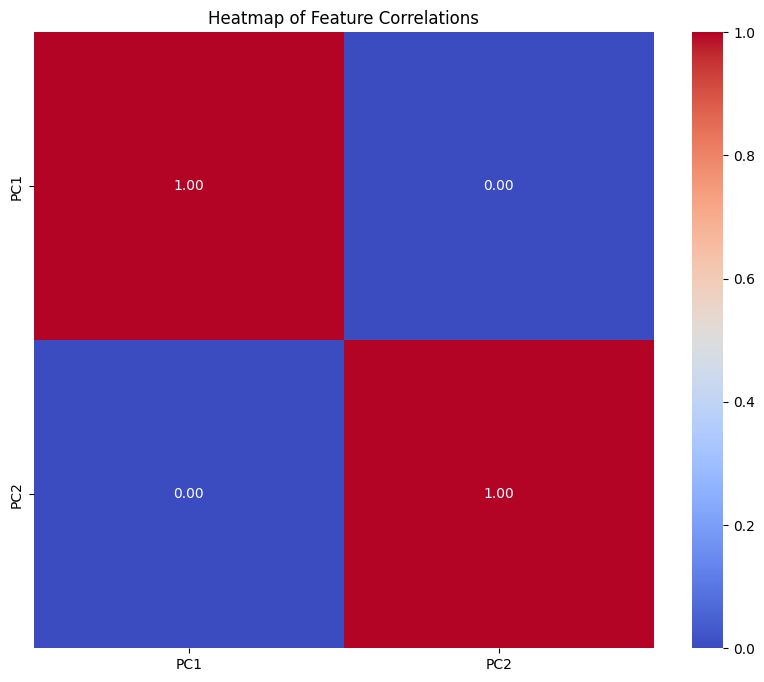

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap of Feature Correlations")
plt.show()

## Hyperparameter Manual

### Error Plot

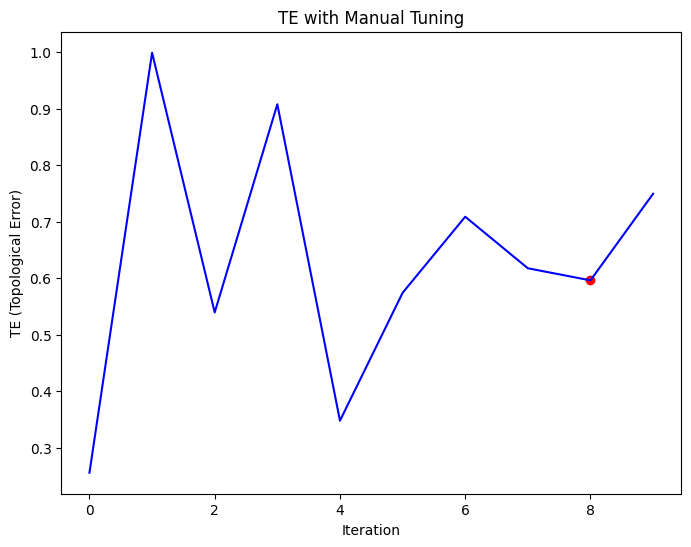

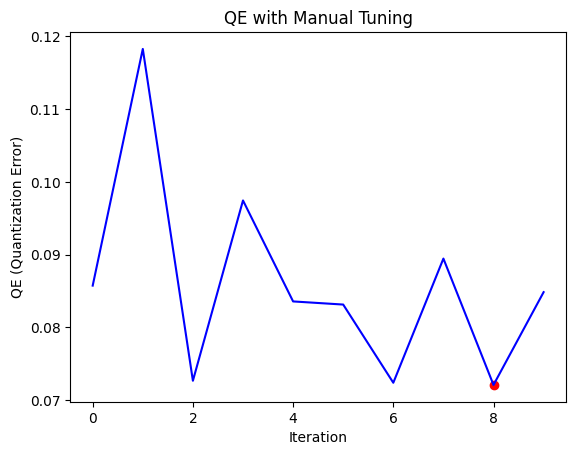

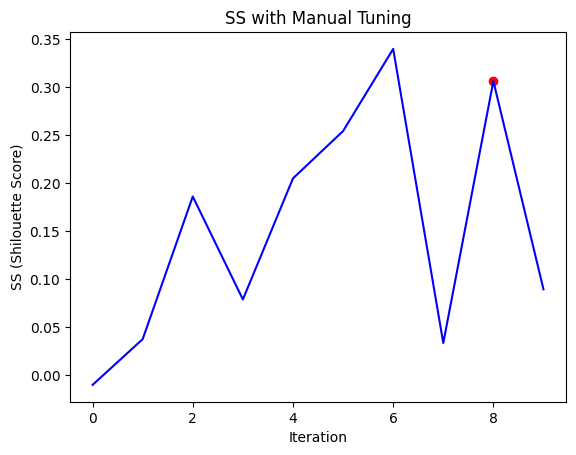

In [ ]:
te_values, qe_values, ss_values = zip(*te_qe_ss_manual_plot)
plt.figure(figsize=(8, 6))
plt.plot(te_values, c="blue", label="TE-QE points")
plt.scatter(best_parameter_manual[0],te_values[best_parameter_manual[0]], color="red")
plt.xlabel("Iteration")
plt.ylabel("TE (Topological Error)")
plt.title("TE with Manual Tuning")
plt.show()

plt.plot(qe_values, c="blue", label="TE-QE points")
plt.scatter(best_parameter_manual[0],qe_values[best_parameter_manual[0]], color="red")
plt.xlabel("Iteration")
plt.ylabel("QE (Quantization Error)")
plt.title("QE with Manual Tuning")
plt.show()

plt.plot(ss_values, c="blue", label="SS points")
plt.scatter(best_parameter_manual[0],ss_values[best_parameter_manual[0]], color="red")
plt.xlabel("Iteration")
plt.ylabel("SS (Shilouette Score)")
plt.title("SS with Manual Tuning")
plt.show()

### Weight Plot

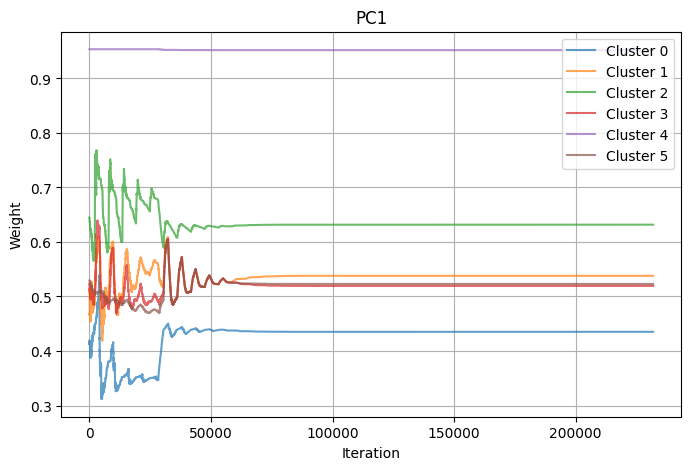

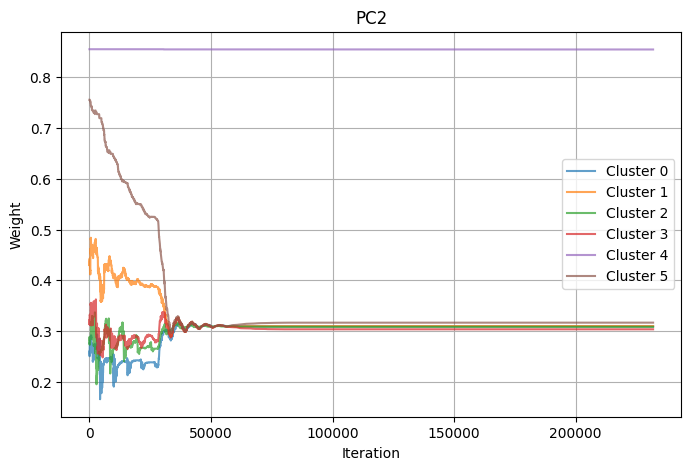

In [ ]:
feature = df.columns.tolist()
w_output = np.array(w_output_manual)

n_features = w_output.shape[-1]
for col in range(n_features):
    plt.figure(figsize=(8, 5))
    for cluster in range(w_output.shape[1]):
        plt.plot(range(w_output.shape[0]), w_output[:, cluster, col], label=f"Cluster {cluster}", alpha=0.7)
    # Use feature[col] for the title
    plt.title(f"{feature[col]}")
    plt.xlabel("Iteration")
    plt.ylabel("Weight")
    plt.legend()
    plt.grid()
    plt.show()

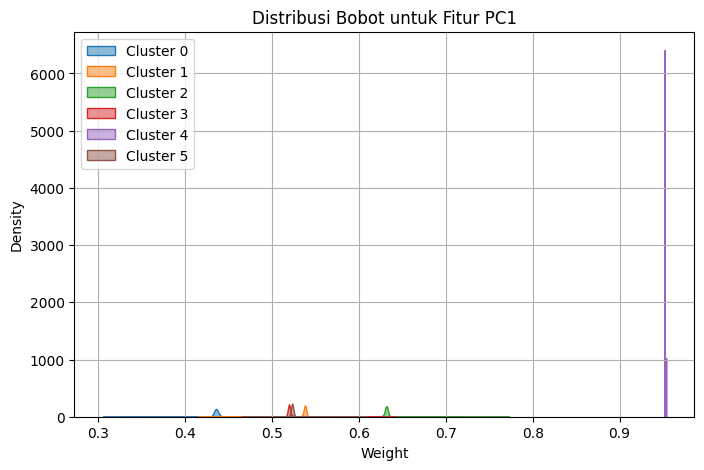

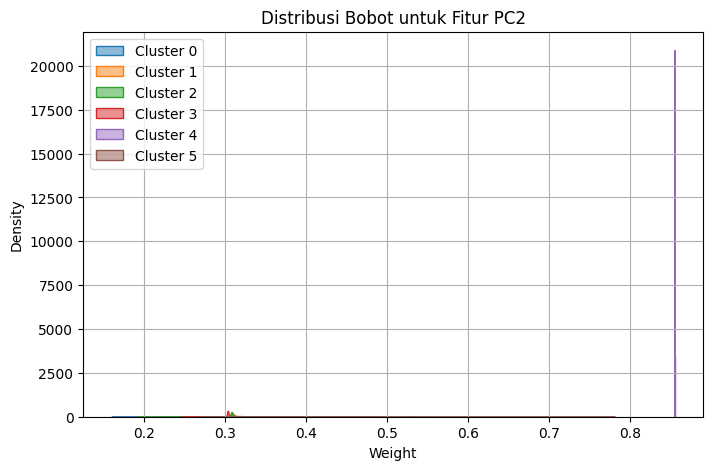

In [ ]:
features = df.columns.tolist()

n_features = w_output.shape[-1]

for col in range(n_features):
    plt.figure(figsize=(8, 5))
    for cluster in range(w_output.shape[1]):
        weights = w_output[:, cluster, col]
        sns.kdeplot(weights, label=f"Cluster {cluster}", fill=True, alpha=0.5)

    plt.title(f"Distribusi Bobot untuk Fitur {features[col]}")
    plt.xlabel("Weight")
    plt.ylabel("Density")
    plt.legend()
    plt.grid()
    plt.show()


C:\Users\hadik\AppData\Local\Temp\ipykernel_31544\3166627232.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


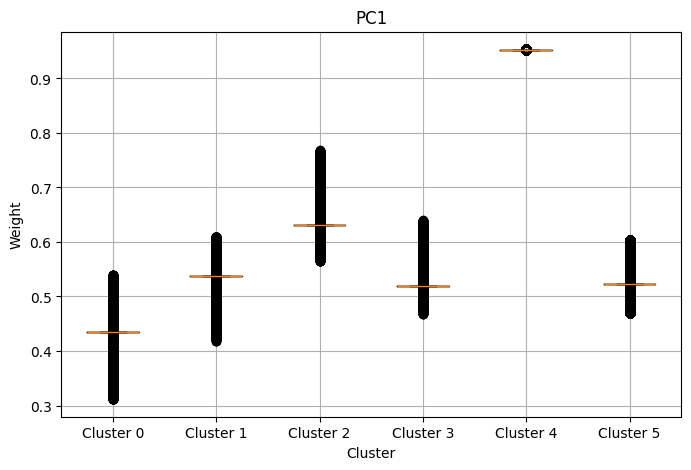

C:\Users\hadik\AppData\Local\Temp\ipykernel_31544\3166627232.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


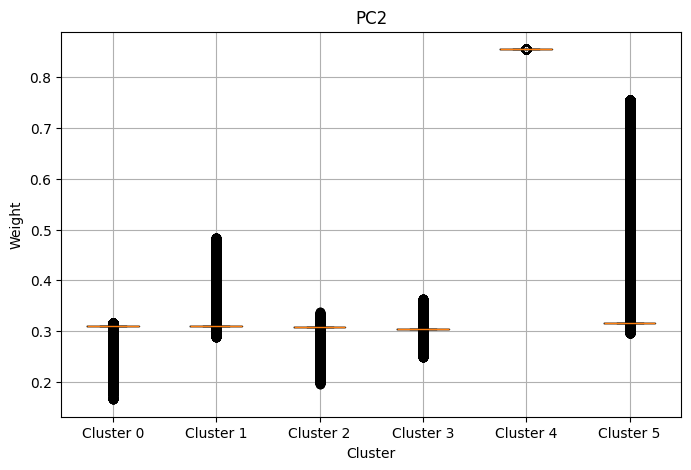

In [ ]:
features = df.columns.tolist()

n_features = w_output.shape[-1]

for col in range(n_features):
    plt.figure(figsize=(8, 5))
    data = [w_output[:, cluster, col] for cluster in range(w_output.shape[1])]
    plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])

    plt.title(f"{features[col]}")
    plt.xlabel("Cluster")
    plt.ylabel("Weight")
    plt.grid()
    plt.show()


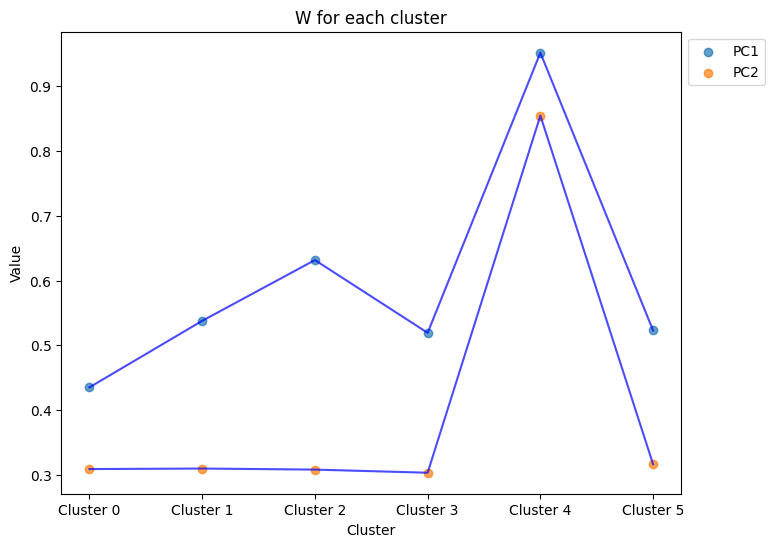

In [ ]:
features = df.columns.tolist()

plt.figure(figsize=(8, 6))
for j, feature in enumerate(features):

    data = [w_manual[i][j] for i in range(len(w_manual))]
    
    plt.scatter(range(len(data)), data, alpha=0.7, label=feature)
    plt.plot(range(len(data)), data, color='b', alpha=0.7, label="_nolegend_")
plt.title(f"W for each cluster")
plt.xlabel("Cluster")
plt.ylabel("Value")
plt.xticks(range(len(w_manual)), [f"Cluster {i}" for i in range(len(w_manual))])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Clustering Plot

C:\Users\hadik\AppData\Local\Temp\ipykernel_31544\3621496219.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_bmu_indices_pca))


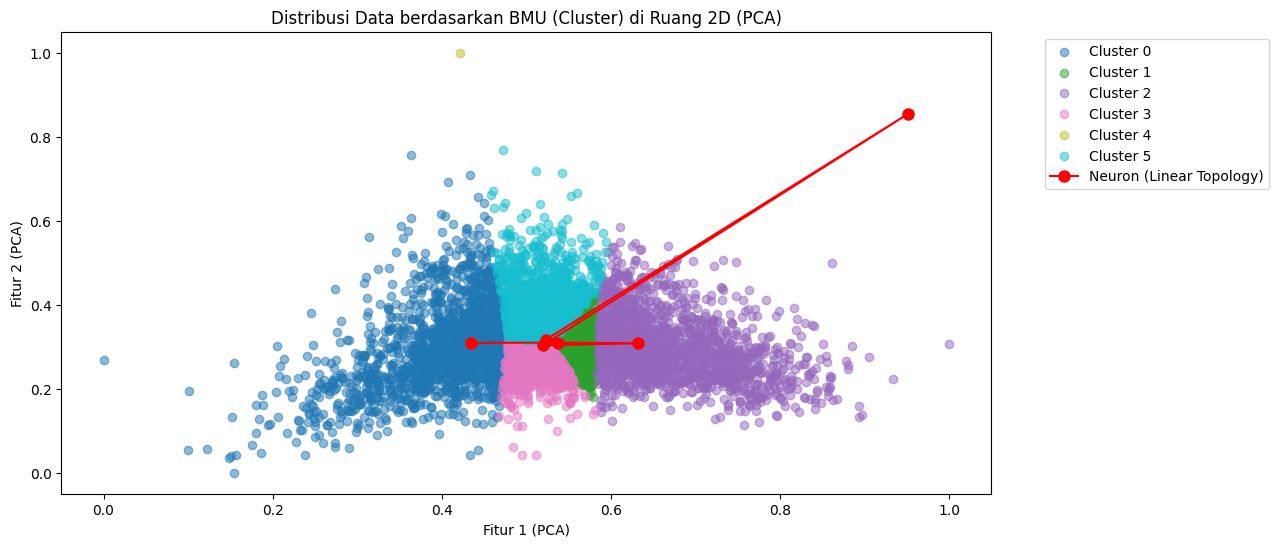

In [ ]:
closest_neighbors = np.array(closest_neighbors_manual)

plt.figure(figsize=(12, 6))

unique_bmu_indices_pca = np.unique(closest_neighbors)
unique_bmu_indices_pca = unique_bmu_indices_pca.argsort()
colors = plt.cm.get_cmap("tab10", len(unique_bmu_indices_pca))

for i, bmu in enumerate(unique_bmu_indices_pca):
    cluster_data_pca = train[closest_neighbors == bmu]
    plt.scatter(cluster_data_pca[:, 0], cluster_data_pca[:, 1], label=f'Cluster {bmu}', color=colors(i), alpha=0.5)

plt.plot(w_manual[:, 0], w_manual[:, 1], 'r-o', label="Neuron (Linear Topology)", markersize=8)

plt.title("Distribusi Data berdasarkan BMU (Cluster) di Ruang 2D (PCA)")
plt.xlabel("Fitur 1 (PCA)")
plt.ylabel("Fitur 2 (PCA)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Hyperparameter Optuna

### Error Plot

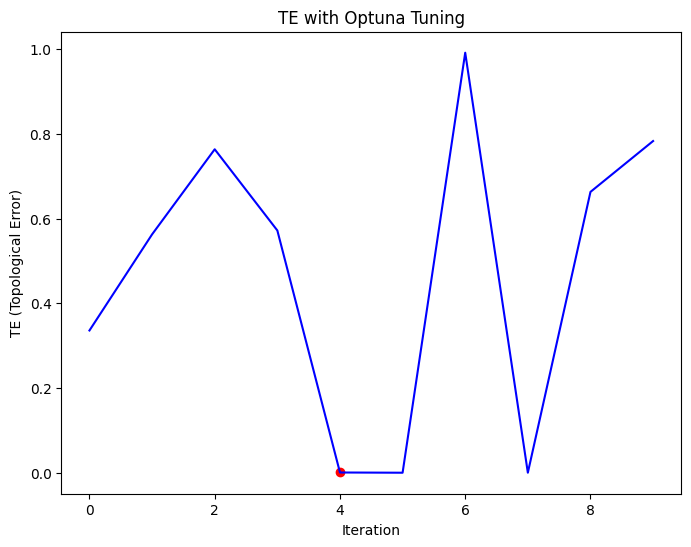

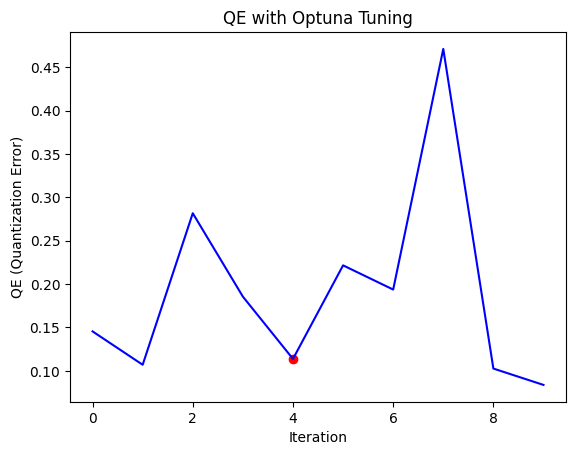

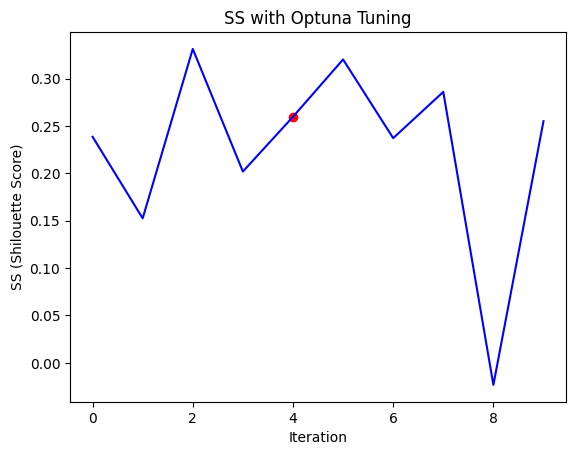

In [ ]:
te_values, qe_values, ss_values = zip(*te_qe_ss_optuna_plot)
plt.figure(figsize=(8, 6))
plt.plot(te_values, c="blue", label="TE-QE points")
plt.scatter(study.best_trial.number,te_values[study.best_trial.number], color="red")
plt.xlabel("Iteration")
plt.ylabel("TE (Topological Error)")
plt.title("TE with Optuna Tuning")
plt.show()

plt.plot(qe_values, c="blue", label="TE-QE points")
plt.scatter(study.best_trial.number,qe_values[study.best_trial.number], color="red")
plt.xlabel("Iteration")
plt.ylabel("QE (Quantization Error)")
plt.title("QE with Optuna Tuning")
plt.show()

plt.plot(ss_values, c="blue", label="TE-ss points")
plt.scatter(study.best_trial.number,ss_values[study.best_trial.number], color="red")
plt.xlabel("Iteration")
plt.ylabel("SS (Shilouette Score)")
plt.title("SS with Optuna Tuning")
plt.show()

### Weight Plot

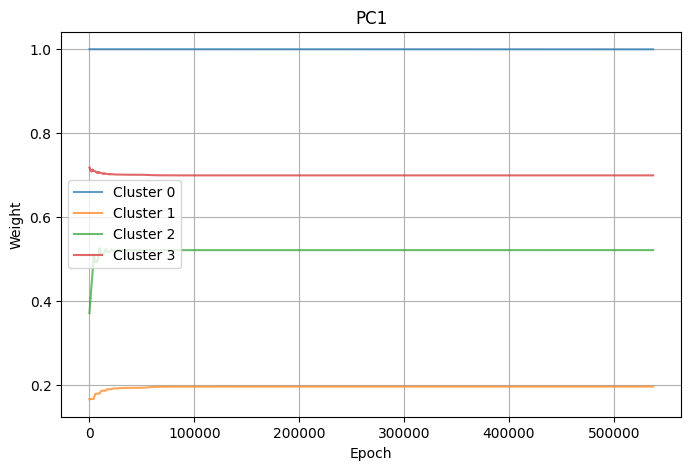

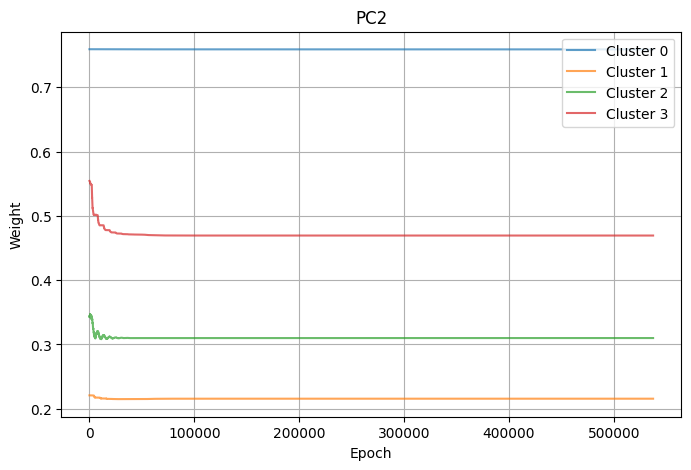

In [ ]:
feature = df.columns.tolist()
w_output = np.array(w_output_optuna)

n_features = w_output.shape[-1]
for col in range(n_features):
    plt.figure(figsize=(8, 5))
    for cluster in range(w_output.shape[1]):
        plt.plot(range(w_output.shape[0]), w_output[:, cluster, col], label=f"Cluster {cluster}", alpha=0.7)
    # Use feature[col] for the title
    plt.title(f"{feature[col]}")
    plt.xlabel("Epoch")
    plt.ylabel("Weight")
    plt.legend()
    plt.grid()
    plt.show()

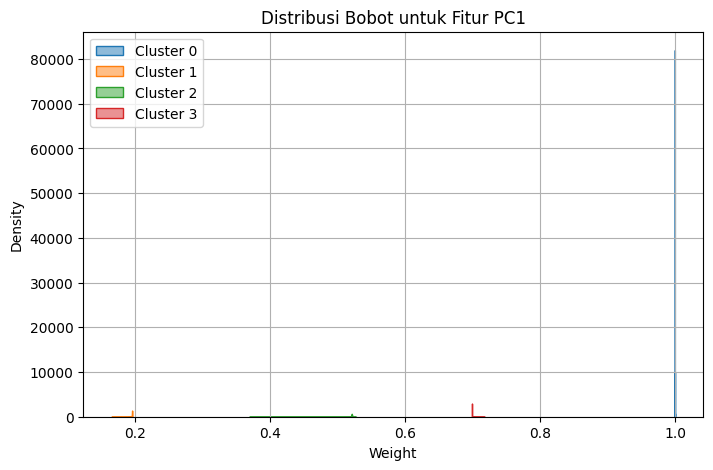

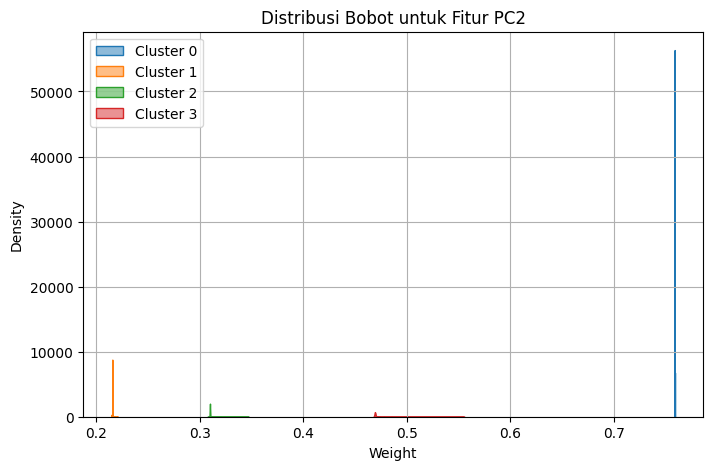

In [ ]:
features = df.columns.tolist()

n_features = w_output.shape[-1]

for col in range(n_features):
    plt.figure(figsize=(8, 5))
    for cluster in range(w_output.shape[1]):
        weights = w_output[:, cluster, col]
        sns.kdeplot(weights, label=f"Cluster {cluster}", fill=True, alpha=0.5)

    plt.title(f"Distribusi Bobot untuk Fitur {features[col]}")
    plt.xlabel("Weight")
    plt.ylabel("Density")
    plt.legend()
    plt.grid()
    plt.show()


C:\Users\hadik\AppData\Local\Temp\ipykernel_31544\3753402374.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


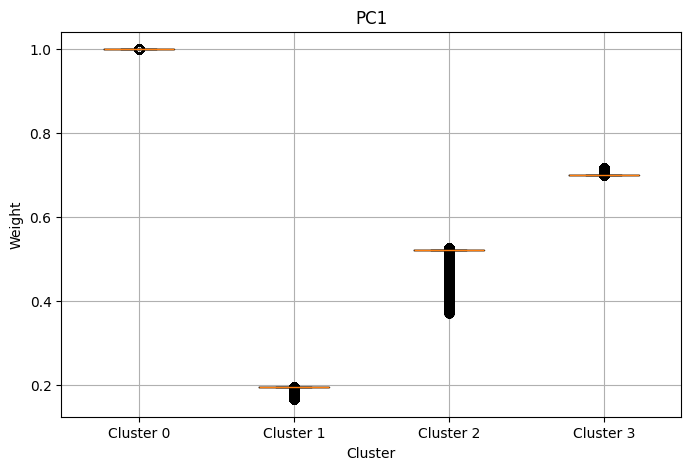

C:\Users\hadik\AppData\Local\Temp\ipykernel_31544\3753402374.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


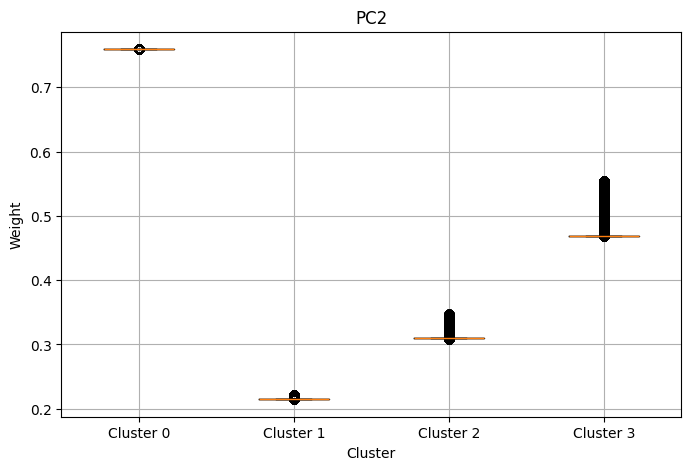

In [ ]:
features = df.columns.tolist()

n_features = w_output.shape[-1]

for col in range(n_features):
    plt.figure(figsize=(8, 5))
    data = [w_output[:, cluster, col] for cluster in range(w_output.shape[1])]
    plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])

    plt.title(f"{features[col]}")
    plt.xlabel("Cluster")
    plt.ylabel("Weight")
    plt.grid()
    plt.show()


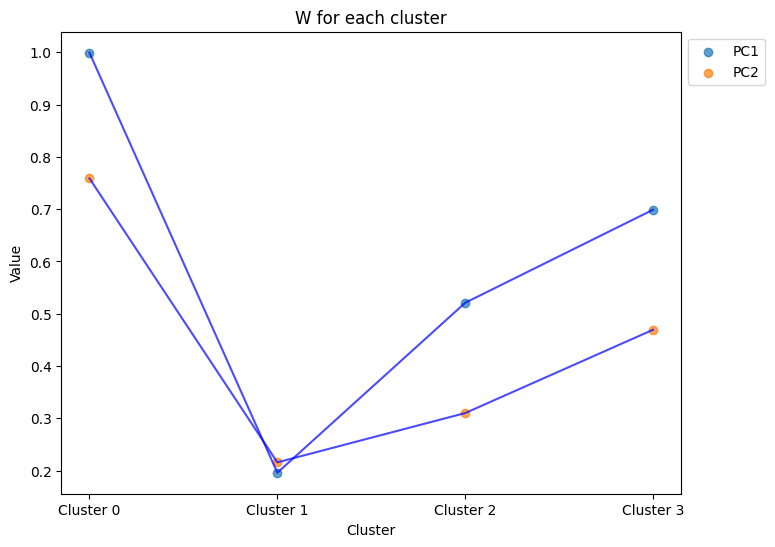

In [ ]:
features = df.columns.tolist()

plt.figure(figsize=(8, 6))
for j, feature in enumerate(features):

    data = [w_optuna[i][j] for i in range(len(w_optuna))]
    
    plt.scatter(range(len(data)), data, alpha=0.7, label=feature)
    plt.plot(range(len(data)), data, color='b', alpha=0.7, label="_nolegend_")
plt.title(f"W for each cluster")
plt.xlabel("Cluster")
plt.ylabel("Value")
plt.xticks(range(len(w_optuna)), [f"Cluster {i}" for i in range(len(w_optuna))])  # Menampilkan cluster 0, 1, 2, 3 pada sumbu x
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Clustering Plot

C:\Users\hadik\AppData\Local\Temp\ipykernel_31544\1695232180.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_bmu_indices_pca))


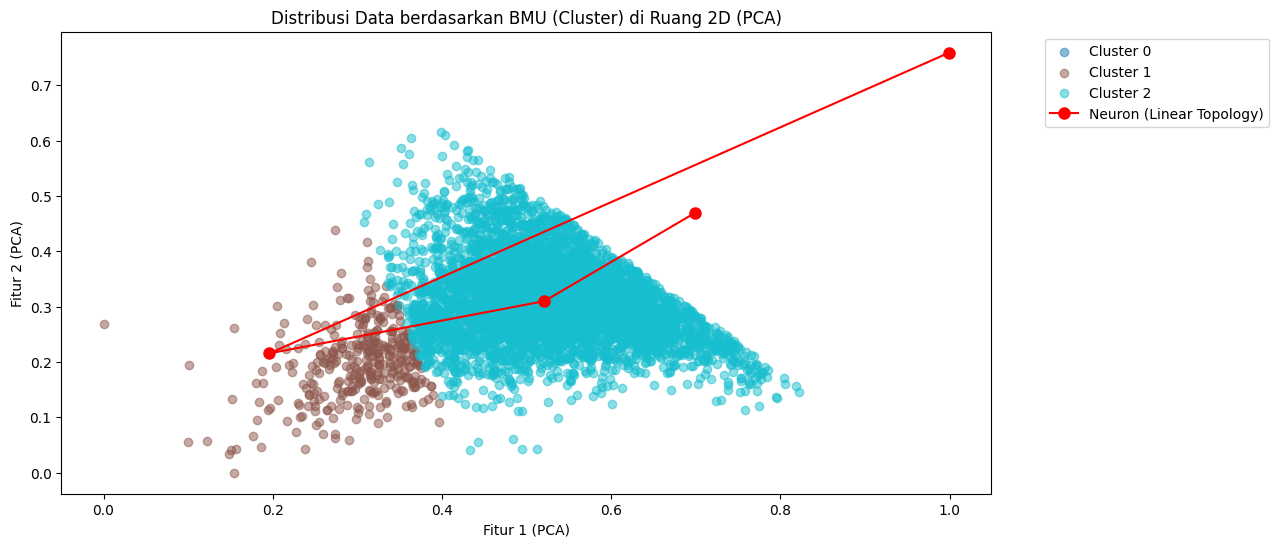

In [ ]:

closest_neighbors = np.array(closest_neighbors_optuna)

plt.figure(figsize=(12, 6))

unique_bmu_indices_pca = np.unique(closest_neighbors)
unique_bmu_indices_pca = unique_bmu_indices_pca.argsort()
colors = plt.cm.get_cmap("tab10", len(unique_bmu_indices_pca))

for i, bmu in enumerate(unique_bmu_indices_pca):
    cluster_data_pca = train[closest_neighbors == bmu]
    plt.scatter(cluster_data_pca[:, 0], cluster_data_pca[:, 1], label=f'Cluster {bmu}', color=colors(i), alpha=0.5)

plt.plot(w_optuna[:, 0], w_optuna[:, 1], 'r-o', label="Neuron (Linear Topology)", markersize=8)

plt.title("Distribusi Data berdasarkan BMU (Cluster) di Ruang 2D (PCA)")
plt.xlabel("Fitur 1 (PCA)")
plt.ylabel("Fitur 2 (PCA)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()